# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [2]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DB5, 0x936B, 0xCF59, 0xE63, 0xEC61, 0xCB59, 0xC959, 0xCB59, 0xA961, 0xA959, 0xA959, 0xCB61, 0xA959, 0xA959, 0xA959, 0xA959, 0x8959, 0xA959, 0x8959, 0xA959, 0xA959, 0x941, 0xC842, 0xC761, 0xB63, 0xB63, 0xC63, 0xA41, 0x452A, 0xC318, 0xA632, 0xC832, 0xC732, 0xA732, 0x8732, 0x8732, 0x8532, 0x8532, 0x452A, 0x4622, 0x2522, 0xA110, 0xC410, 0xC410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0xE618, 0xE620, 0xE720, 0x2522, 0x6A41, 0xCB41, 0xF31, 0x931, 0xAA22, 0x6A39, 0xAB39, 0xF4B, 0x8941, 0xE31, 0x6749, 0xAC32, 0x522, 0x472A, 0x4522, 0x522, 0xE620, 0xE418, 0xC418, 0xC418, 0xC318, 0xA318, 0xC318, 0xC318, 0x622, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0x262A, 0x262A, 0x2622, 0x652A, 0xA73A, 0xE842, 0xA41, 0x6949, 0x8B49, 0xCC51, 0xEE59, 0xEC59, 0xEC59, 0xEB59, 0x6949, 0x4A49, 0x839, 0xC732, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDAE, 0x7163, 0xEF61, 0xE63, 0xCC59, 0xCB61, 0xE961, 0xA961, 0xA961, 0xA961, 0xA959, 0xA961, 0xA961, 0xA959, 0x8959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA959, 0xC959, 0x949, 0xA842, 0xA761, 0x2B6B, 0x2B63, 0x2C63, 0xEA3A, 0x2522, 0xE318, 0xC432, 0xC832, 0xC732, 0xA732, 0xA732, 0x8732, 0xA732, 0x8532, 0x452A, 0x462A, 0x2522, 0xC110, 0xC410, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0xA110, 0x61A, 0x4A41, 0x4722, 0x6722, 0xCA41, 0x2C53, 0xAE22, 0x6941, 0x4C39, 0x6B39, 0x4C39, 0xCD49, 0x6B41, 0x8C2A, 0xA849, 0xAC32, 0x2522, 0x652A, 0x522, 0x522, 0xE620, 0xE418, 0xC418, 0xC418, 0xA418, 0xA318, 0xC318, 0xC418, 0x2622, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xE420, 0xC420, 0xE420, 0x422, 0xE618, 0x8532, 0x452A, 0x652A, 0x8532, 0x8532, 0xE842, 0xA41, 0x6951, 0x8B51, 0xAC51, 0xEE59, 0xEB61, 0xEC59, 0xB63, 0xAB51, 0x6951, 0xA41, 0xC83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDAE, 0x5363, 0xEF61, 0xC63, 0xCC61, 0xCB61, 0xCB61, 0xC961, 0xA961, 0xA961, 0xA959, 0xA961, 0x8959, 0xAB59, 0xA959, 0xA959, 0xA959, 0xC959, 0xA959, 0xA959, 0xC959, 0x949, 0xA842, 0xA761, 0x2B6B, 0x2B63, 0x2C63, 0xA39, 0x522, 0xE418, 0xE432, 0xE83A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA532, 0x8532, 0x452A, 0x462A, 0x2622, 0xC110, 0xC410, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0xA110, 0xE610, 0x6A41, 0xCA2A, 0x2A31, 0x2B31, 0x8B41, 0x6B22, 0x4C39, 0xC31, 0x939, 0xEB32, 0xC41, 0x4A2A, 0x2822, 0xC732, 0x8A2A, 0x2722, 0x2522, 0xC618, 0xE618, 0x2622, 0xE318, 0xC418, 0xC418, 0xA418, 0xA318, 0xA418, 0xE418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC418, 0xE318, 0xE420, 0xE420, 0xE620, 0xE620, 0x61A, 0x472A, 0x452A, 0x452A, 0xC53A, 0xA732, 0xC83A, 0x2A49, 0x8951, 0x8B51, 0xCC59, 0xCC61, 0xEC61, 0xEC59, 0xEC59, 0x8B51, 0x8B51, 0x841, 0xC83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBDA6, 0x5363, 0xEF61, 0xEC61, 0xEB61, 0xCB61, 0xCB61, 0xC961, 0xA959, 0xA959, 0xA959, 0xA961, 0x8959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA951, 0xC959, 0x2941, 0xA842, 0xE761, 0xB6B, 0xB63, 0x2C63, 0xEA3A, 0x522, 0xC418, 0xA632, 0xA832, 0x8532, 0xA732, 0xA732, 0xA732, 0xA532, 0x872A, 0x652A, 0x462A, 0x2522, 0xC110, 0xE410, 0xA410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0x261A, 0xC72A, 0xAA2A, 0xA39, 0x8A2A, 0x8C49, 0xAB2A, 0x2C41, 0x2C39, 0x8E49, 0xC31, 0x4E39, 0x8B32, 0x2722, 0x2522, 0x4522, 0x2522, 0x522, 0x2622, 0x652A, 0x652A, 0xE418, 0xC418, 0xC418, 0xA318, 0xA418, 0xC418, 0xA418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC420, 0xC320, 0xE420, 0xE420, 0xE420, 0x622, 0x4622, 0x4522, 0x452A, 0x452A, 0xC53A, 0xE532, 0x8B49, 0x2941, 0x8A51, 0xAB51, 0xAC59, 0xEC61, 0xC63, 0xEE61, 0xCC59, 0x8B51, 0x8B51, 0x841, 0xC83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DA6, 0x3363, 0xEF61, 0xCC61, 0xCB61, 0xCB61, 0xCB61, 0xAB59, 0xA959, 0xC959, 0xA959, 0xA959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC961, 0xA959, 0xA959, 0xA951, 0x941, 0xA73A, 0x86B, 0x2B6B, 0x2C63, 0x2C63, 0x939, 0x51A, 0xC418, 0xC63A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA532, 0xA532, 0x6532, 0x652A, 0x662A, 0x622, 0xE110, 0xE310, 0xA410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x51A, 0x6722, 0xA82A, 0x8932, 0x882A, 0xC39, 0xAA32, 0x2E41, 0xCB51, 0xD53, 0xB31, 0xEC2A, 0x2A22, 0x2522, 0x252A, 0x462A, 0x522, 0x652A, 0x652A, 0xA52A, 0x652A, 0xE418, 0xC418, 0xC318, 0xC318, 0xC418, 0xA418, 0xC418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x2622, 0x2622, 0x462A, 0x452A, 0xA732, 0x639, 0x8C41, 0x2941, 0x8A49, 0xAB51, 0xEE61, 0xEE61, 0xEE61, 0xEE61, 0xCE59, 0xAB59, 0xAB51, 0x2841, 0xC83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3D96, 0x3363, 0xEF61, 0xCC61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xC959, 0xC959, 0xC961, 0xA959, 0xC959, 0xA959, 0xC959, 0x8951, 0x2941, 0xA73A, 0xE769, 0xB63, 0x2C63, 0xC63, 0xE93A, 0x522, 0xC418, 0xA63A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA532, 0x8532, 0x8732, 0x652A, 0x662A, 0x51A, 0xE110, 0xE310, 0xA410, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0x8110, 0xA310, 0x8832, 0x252A, 0x2A22, 0xAC49, 0x6E41, 0xAA32, 0x4D49, 0xCC49, 0xF53, 0xEB2A, 0x8922, 0xC832, 0x472A, 0x8732, 0x4949, 0x262A, 0x4522, 0x2522, 0x2522, 0xC618, 0xC318, 0xC418, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x2622, 0x262A, 0x452A, 0x452A, 0x872A, 0x8549, 0xE93A, 0x2841, 0x6949, 0xEC51, 0xEE59, 0xEE59, 0x2E63, 0x2E63, 0xE63, 0xAC59, 0x6951, 0x2A41, 0xEA3A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3D96, 0x3363, 0xCF61, 0xCC61, 0xCC61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xAB59, 0xA959, 0xA959, 0xC959, 0xC959, 0xC961, 0xA961, 0xC959, 0xA959, 0xA959, 0x6951, 0xE942, 0xE742, 0x486B, 0xB63, 0x2C63, 0x2C63, 0xC93A, 0x622, 0xC418, 0xC63A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0x8732, 0x662A, 0x652A, 0xE518, 0xE110, 0xE318, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xA12A, 0x6939, 0xE39, 0xE720, 0x2822, 0x8C41, 0x6E41, 0x2A22, 0xEB32, 0xA92A, 0x692A, 0xC732, 0x4A39, 0x8B41, 0x4941, 0x892A, 0x2941, 0x252A, 0x272A, 0x2522, 0x622, 0xC418, 0xC418, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE620, 0x622, 0x622, 0x622, 0x252A, 0x452A, 0x662A, 0x8732, 0xC53A, 0xE73A, 0x2A41, 0x6949, 0xEC51, 0xEE59, 0xC5B, 0x2E5B, 0x2E5B, 0x4E63, 0xC5B, 0xEB59, 0x4B41, 0xCA3A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD8C, 0x3163, 0xCF61, 0xCC61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xAB59, 0xA959, 0xA959, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA959, 0x8951, 0x941, 0xC742, 0x286B, 0xB63, 0x2B63, 0xC5B, 0xEA3A, 0x622, 0xC418, 0xC63A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x662A, 0x652A, 0xE518, 0xC318, 0xE318, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x131, 0x2E53, 0xD31, 0x6A2A, 0x939, 0x6A2A, 0x4822, 0xCB32, 0x2822, 0x722, 0xC718, 0xE83A, 0xA39, 0x2939, 0x2939, 0xB39, 0x682A, 0x2622, 0x482A, 0x2522, 0xE618, 0xE418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x622, 0x622, 0x2622, 0x452A, 0x462A, 0x6632, 0x8732, 0xC73A, 0x841, 0x4A49, 0x8B49, 0xEC51, 0xC5B, 0xC5B, 0x2E5B, 0x2E5B, 0x2E63, 0xEE59, 0xEC59, 0x2B41, 0xC83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD8C, 0x1163, 0xEF61, 0xEC61, 0xCC59, 0xCB59, 0xCB59, 0xAB59, 0xCB59, 0xAB59, 0xA959, 0xA959, 0xC959, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xA959, 0xA959, 0x8951, 0xA41, 0xE842, 0x286B, 0xB63, 0x2B63, 0xC63, 0xC83A, 0x622, 0xC418, 0xC63A, 0xC832, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x662A, 0x652A, 0xE518, 0xC318, 0xE418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8122, 0xAE49, 0xEE32, 0x4939, 0xCE32, 0xAA32, 0xA832, 0xC932, 0x8832, 0xCA3A, 0xC932, 0xA41, 0x6932, 0x682A, 0x8A2A, 0xCA32, 0x2822, 0xE518, 0x4722, 0x4622, 0xE618, 0xC418, 0xC420, 0xA418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE420, 0x622, 0x2622, 0x2622, 0x452A, 0x462A, 0x4632, 0x8732, 0xA73A, 0xE842, 0x4A41, 0x6B49, 0xCC51, 0xB5B, 0x2C5B, 0x2E5B, 0xC5B, 0xEC59, 0x8C51, 0x8B51, 0xE942, 0xA83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBD84, 0x1263, 0xD63, 0xEC61, 0xCC59, 0xCB59, 0xAB59, 0xAB59, 0xAB59, 0xA959, 0xC959, 0xC959, 0xA959, 0xC959, 0xC959, 0xE959, 0xC959, 0xA959, 0xA959, 0xA951, 0xCB59, 0x939, 0xE842, 0x86B, 0xB63, 0xB63, 0xC63, 0xAA32, 0xE620, 0xC418, 0xC63A, 0xC83A, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x662A, 0x662A, 0xE518, 0xC318, 0xE318, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8422, 0x304B, 0xF4B, 0x2A31, 0xAE2A, 0x2A22, 0x841, 0x6A2A, 0xA93A, 0xA41, 0xCA3A, 0xCA3A, 0x492A, 0x822, 0xE718, 0x672A, 0x61A, 0x61A, 0x61A, 0x2522, 0xE418, 0xC418, 0xC418, 0xC318, 0xC420, 0xA318, 0xA318, 0x8410, 0xA418, 0xC420, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x2622, 0x2622, 0x452A, 0x662A, 0x8732, 0xA73A, 0xE842, 0x4A49, 0x6949, 0xB5B, 0x4B63, 0x2C5B, 0x2E5B, 0x2E5B, 0x2C5B, 0xEE59, 0x6949, 0x2941, 0xE83A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBD84, 0xF159, 0xF63, 0xEC61, 0xEB59, 0xCB59, 0xAB59, 0xA959, 0xA959, 0xC959, 0xA959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xE959, 0xA959, 0xA951, 0xC959, 0xA41, 0xC83A, 0x86B, 0xB63, 0x2B63, 0xEC61, 0xAA32, 0x622, 0xA418, 0xE53A, 0xC73A, 0xA732, 0x8732, 0xA732, 0xA732, 0xA732, 0xA732, 0x662A, 0x662A, 0xE610, 0xC318, 0xE410, 0x8410, 0xA110, 0xA310, 0x8310, 0x8110, 0x8110, 0x312, 0xC29, 0x8B39, 0x8722, 0x2939, 0x6941, 0x8C2A, 0xC73A, 0x8C32, 0xAA3A, 0x8A32, 0x6832, 0xE83A, 0xCA32, 0xA82A, 0x8A2A, 0x662A, 0x6522, 0x251A, 0x2522, 0xE420, 0xC418, 0x31A, 0x422, 0xE418, 0xE318, 0x462A, 0xC618, 0xC620, 0xE620, 0xE418, 0xC418, 0xE418, 0xE420, 0xC418, 0xE418, 0xE618, 0xE618, 0x41A, 0xE418, 0xE420, 0x422, 0xE620, 0x422, 0x2622, 0x2622, 0x2522, 0x672A, 0xA532, 0x8732, 0xA83A, 0xE83A, 0x6A49, 0x8949, 0xC5B, 0x6C63, 0x2C5B, 0x2C5B, 0x2E5B, 0xC5B, 0xEE59, 0x8A49, 0xA41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D84, 0x1263, 0xF63, 0xEC61, 0xCB59, 0xCB59, 0xAB59, 0xA959, 0xA959, 0xC959, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xA959, 0xC951, 0xE93A, 0xC742, 0xA6B, 0xB6B, 0xB6B, 0xEC61, 0xAA32, 0xE618, 0xC418, 0xE542, 0xC73A, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x662A, 0x662A, 0xE518, 0xE310, 0xE410, 0xA410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xA310, 0x8710, 0x8410, 0xE620, 0x4522, 0x2A39, 0x4B1A, 0x8A49, 0x8C2A, 0xCA3A, 0x939, 0x892A, 0xC83A, 0x2939, 0x2939, 0x4822, 0x652A, 0x4722, 0x4522, 0x622, 0xE420, 0xC418, 0x2422, 0x2422, 0x2622, 0x831, 0xA832, 0xC718, 0xC618, 0xE620, 0xE420, 0xE420, 0xE420, 0xE418, 0xE420, 0x41A, 0xE418, 0x2622, 0x4622, 0x61A, 0x422, 0x422, 0x422, 0x622, 0x2622, 0x262A, 0x452A, 0x6732, 0x6732, 0x8732, 0xE83A, 0x2841, 0x6949, 0x8949, 0xEC59, 0x4C63, 0x2E5B, 0xE5B, 0x2C5B, 0xC5B, 0xAC51, 0xA951, 0x2A41, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3E7C, 0x1163, 0xF63, 0xCC59, 0xCB59, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xCB59, 0xC93A, 0xE742, 0xEA61, 0xB63, 0x4B6B, 0xEC59, 0xAA3A, 0xC618, 0xC418, 0xC542, 0xC83A, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x8532, 0x652A, 0x862A, 0xE618, 0xC318, 0xE418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0x2522, 0xE518, 0xC520, 0x462A, 0xCA32, 0x8B22, 0x2939, 0x939, 0xEB32, 0x4B39, 0xCB32, 0x682A, 0x272A, 0x722, 0xE620, 0xE520, 0x522, 0x2522, 0x51A, 0x622, 0x61A, 0xE418, 0x622, 0x2622, 0xC832, 0x4722, 0x522, 0xC418, 0xE620, 0x622, 0xE620, 0xE620, 0xE418, 0xE418, 0xE418, 0xE618, 0x2622, 0x2622, 0x41A, 0x422, 0x622, 0x622, 0x622, 0x2622, 0x452A, 0x452A, 0x6732, 0x8732, 0x672A, 0x839, 0xA851, 0x8C51, 0x8B51, 0xEC59, 0x2C5B, 0x2C63, 0x2E5B, 0xE5B, 0xC5B, 0xEC59, 0xCB59, 0x2A49, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5E7C, 0x3163, 0xEF61, 0xCC61, 0xCB59, 0xAB59, 0xA959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC961, 0xC959, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xCB59, 0xC93A, 0xE742, 0xA63, 0xB63, 0x4B6B, 0xCC59, 0xAA3A, 0xC518, 0xE420, 0xE542, 0xC73A, 0x8732, 0xA732, 0xA732, 0xA732, 0xA532, 0xA532, 0x652A, 0x662A, 0xC618, 0xC318, 0xC418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xE118, 0xC832, 0xE718, 0xC83A, 0x4A41, 0xEA32, 0x6B22, 0xC932, 0x4B41, 0x4C39, 0xEA2A, 0xB31, 0x271A, 0x722, 0xE518, 0x522, 0x522, 0x252A, 0x252A, 0x2522, 0x2622, 0xE420, 0xE420, 0x422, 0xC618, 0xC618, 0xC418, 0x2522, 0x41A, 0x622, 0x622, 0x622, 0xE620, 0xE420, 0xE420, 0xE420, 0xC418, 0xC618, 0xE418, 0x422, 0x2422, 0x61A, 0x2622, 0x2622, 0x2622, 0x452A, 0x652A, 0x6732, 0x8732, 0x672A, 0x841, 0x4849, 0x4B51, 0x8951, 0xCC51, 0xC5B, 0x2E63, 0xE63, 0xE63, 0xC5B, 0xEC59, 0xAB51, 0x4A49, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFC73, 0xF161, 0xAD59, 0xEC61, 0xCB59, 0xAB59, 0xC959, 0xA959, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xAB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xCA3A, 0x741, 0xA63, 0x2B63, 0x2B63, 0xEC59, 0xCA3A, 0xC518, 0xC420, 0xE542, 0xE83A, 0xA732, 0xA532, 0xA532, 0xA532, 0xA532, 0x8532, 0x652A, 0x662A, 0xE618, 0xE318, 0xE318, 0x8310, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x31A, 0x2A39, 0xC832, 0x8B49, 0xCB32, 0x8A2A, 0x2A22, 0xA932, 0x4941, 0xAE41, 0x931, 0xC31, 0x6A2A, 0x2822, 0xA52A, 0x2822, 0x2522, 0x722, 0x522, 0x252A, 0x452A, 0x452A, 0x6532, 0xE620, 0x622, 0x622, 0xE620, 0x522, 0x41A, 0x622, 0x61A, 0x622, 0xE620, 0xE620, 0xE620, 0xC618, 0xE418, 0x2422, 0xE418, 0x622, 0x2422, 0x2622, 0x4622, 0x2522, 0x2622, 0x4522, 0x8732, 0x8732, 0x8732, 0x6532, 0xE73A, 0x841, 0xEA42, 0x6951, 0xAB51, 0xC63, 0x2E63, 0x4E63, 0x2E63, 0xC63, 0xC5B, 0xAB51, 0x4A49, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1C7C, 0x1163, 0xCD59, 0xEC61, 0xCB59, 0xCB59, 0xC959, 0xA959, 0xC959, 0xA959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xCA3A, 0xE742, 0x2A63, 0x2B63, 0x4B6B, 0xEC59, 0xAA32, 0xA518, 0xE420, 0x541, 0xE83A, 0x8732, 0xA532, 0xA532, 0xA532, 0xA532, 0xA52A, 0x652A, 0x662A, 0xC618, 0xC318, 0xE418, 0x8310, 0x8110, 0xC310, 0xA310, 0x8110, 0x8110, 0x211A, 0x831, 0xE832, 0x4B41, 0xA92A, 0x6A2A, 0x8932, 0x4822, 0x8B49, 0x6E39, 0x4E39, 0xEB32, 0x882A, 0xAA2A, 0xE732, 0x482A, 0x252A, 0xE518, 0xA832, 0xAA32, 0x6A32, 0x272A, 0x272A, 0xE520, 0xE620, 0x622, 0x622, 0x452A, 0x622, 0x622, 0x2622, 0x622, 0x622, 0xE418, 0xE418, 0x41A, 0xC532, 0x4722, 0x2622, 0x2622, 0x2622, 0x2622, 0x2622, 0x2622, 0x2622, 0x2522, 0x872A, 0x872A, 0x872A, 0xA732, 0xC73A, 0x2841, 0x2A41, 0x8951, 0x8C51, 0xC63, 0x4E63, 0x2E63, 0xE63, 0xC63, 0xC5B, 0xCB59, 0x4A49, 0xE842, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFB7B, 0xF161, 0xCD61, 0xEC61, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xA959, 0xA959, 0xA959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xA41, 0xE842, 0x296B, 0xB63, 0x4B63, 0xC5B, 0xAA32, 0xC618, 0xE320, 0x4541, 0xE73A, 0xA732, 0xA732, 0xA732, 0xA732, 0x8532, 0x852A, 0x652A, 0x662A, 0xE618, 0xC310, 0x41A, 0x8310, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0x211A, 0x6A41, 0x892A, 0x6949, 0x6B2A, 0xCA32, 0xEC3A, 0x6A2A, 0xAB49, 0xD31, 0x6922, 0xAA2A, 0x2A1A, 0x4A22, 0x6732, 0x272A, 0xE720, 0x522, 0x8A2A, 0x472A, 0x482A, 0x72A, 0x282A, 0xE620, 0x622, 0x622, 0x2622, 0x452A, 0xE618, 0x622, 0x522, 0xE618, 0xE618, 0x662A, 0xE518, 0xC610, 0xA532, 0x4722, 0xE618, 0x2522, 0x2522, 0x622, 0x622, 0x2622, 0x2622, 0x2522, 0x672A, 0x672A, 0x652A, 0x8732, 0xA732, 0x4841, 0x4A41, 0xAB51, 0xAB51, 0x2C5B, 0x4E63, 0x6E6B, 0xE63, 0xEC59, 0xEE59, 0xAC51, 0x8951, 0x2841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFB73, 0xF161, 0xED61, 0xEC61, 0xCB61, 0xCB61, 0xAB59, 0xC959, 0xC959, 0xEB61, 0xCB61, 0xA961, 0xAB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0x8951, 0xA83A, 0xA53A, 0x963, 0xB63, 0x2B63, 0xEC59, 0xC832, 0xC618, 0x322, 0x2541, 0x739, 0xA732, 0xA732, 0xA532, 0xA72A, 0xA72A, 0x852A, 0x652A, 0x662A, 0xC618, 0xC310, 0x41A, 0x8310, 0xA110, 0xC310, 0x8310, 0x8110, 0x8110, 0x312, 0x8941, 0x8B2A, 0xC83A, 0x922, 0x883A, 0x4B32, 0xCB3A, 0x8C49, 0xAD2A, 0x4822, 0xA82A, 0xEA32, 0xC932, 0xEA3A, 0x4B41, 0xEB3A, 0xEA3A, 0xC832, 0x51A, 0x2522, 0x682A, 0x2522, 0x672A, 0x4522, 0x51A, 0x61A, 0xE518, 0x652A, 0x2722, 0xE620, 0xC618, 0x622, 0x8632, 0x722, 0xC618, 0x8732, 0x272A, 0xC618, 0x4522, 0x2622, 0x2622, 0x622, 0x622, 0x2522, 0x452A, 0x472A, 0x452A, 0x672A, 0xA532, 0xA73A, 0x4841, 0x4A41, 0xA951, 0xAB51, 0xEC59, 0x4E63, 0x6E6B, 0xC63, 0x2E63, 0xEE59, 0xAB51, 0xEB59, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD973, 0xF161, 0xED61, 0xEC61, 0xCB61, 0xCB61, 0xAB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xCB59, 0x8B51, 0x8A3A, 0xC542, 0x2B6B, 0xB63, 0x4B6B, 0xCB59, 0xC832, 0xC618, 0xE318, 0x2541, 0xC532, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA532, 0x652A, 0x662A, 0xC610, 0xE310, 0xE318, 0x8310, 0xA110, 0xC310, 0x8310, 0x8110, 0x8110, 0x11A, 0x6839, 0x6A41, 0x6949, 0xAC3A, 0xC93A, 0x8B49, 0x1039, 0x4C41, 0xEB3A, 0x4A22, 0xA82A, 0xA82A, 0x6B41, 0xCB32, 0xB41, 0xA932, 0xEA32, 0xEA32, 0x2722, 0x6522, 0x8832, 0x452A, 0x872A, 0x6522, 0x61A, 0xE618, 0x4522, 0xC832, 0x682A, 0x522, 0x452A, 0x8732, 0x2722, 0x4622, 0x4522, 0x8732, 0x2722, 0x2622, 0x882A, 0x4522, 0x652A, 0x2622, 0x622, 0x622, 0x652A, 0x652A, 0x452A, 0x652A, 0x8532, 0xA732, 0x4841, 0x4A41, 0x8949, 0xCB59, 0xEC59, 0x2E63, 0x6D6B, 0x2D63, 0x4E6B, 0xEE59, 0xAC51, 0xEC59, 0x2A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD973, 0xF161, 0xED61, 0xCC61, 0xEB61, 0xCB61, 0xAB61, 0xC961, 0xC961, 0xCB61, 0xCB59, 0xC961, 0xC959, 0xA959, 0xC959, 0xC959, 0xC961, 0xC959, 0xE959, 0xCB59, 0x8B51, 0xCA42, 0x749, 0x2B6B, 0xB63, 0x2B63, 0xEC51, 0xC832, 0xC610, 0xE318, 0x2541, 0xE532, 0xC732, 0xA732, 0xC732, 0xA732, 0xA732, 0xA52A, 0x652A, 0x662A, 0xC618, 0xE310, 0xE318, 0x8310, 0xA110, 0xC310, 0x8310, 0x8110, 0x8110, 0xC310, 0x6722, 0x731, 0x6D63, 0xAF51, 0x2E49, 0x4941, 0x7041, 0xEB3A, 0x4C41, 0x4B39, 0xCC41, 0xCE49, 0x939, 0xCC32, 0xA932, 0xE718, 0x8732, 0x882A, 0x722, 0x6722, 0xAA2A, 0x4522, 0x652A, 0x4722, 0x622, 0xE618, 0x2522, 0x4522, 0x4722, 0x4722, 0xE83A, 0xA832, 0x452A, 0x452A, 0xC518, 0x522, 0x522, 0x672A, 0x8732, 0x652A, 0x652A, 0x622, 0x622, 0x622, 0x252A, 0x252A, 0x452A, 0x452A, 0x8732, 0xC73A, 0x2A41, 0x2A41, 0x8949, 0xEB59, 0xEC59, 0x4E6B, 0x6D6B, 0x4D6B, 0x4D6B, 0xEE59, 0xAE51, 0x8B51, 0x2A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD973, 0x1263, 0xED61, 0xEB61, 0xEC61, 0xC961, 0xAB61, 0xC961, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xE959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0x8B51, 0xCA3A, 0x2541, 0x4A6B, 0x2B63, 0x2C63, 0xCC51, 0xC832, 0xA610, 0xE318, 0x2541, 0xE732, 0xC532, 0xC732, 0xA732, 0xA732, 0xA72A, 0x872A, 0x652A, 0x652A, 0xC618, 0xC318, 0xE418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8310, 0xC618, 0x8410, 0x8849, 0xEE32, 0xCB3A, 0xC83A, 0xCD3A, 0x4A22, 0xCC3A, 0xE932, 0x6C41, 0xAE49, 0x8B32, 0x692A, 0xE93A, 0xE732, 0xA932, 0x2722, 0x652A, 0x4822, 0x282A, 0x272A, 0x472A, 0x722, 0xC618, 0xE418, 0x622, 0xC518, 0x61A, 0x6722, 0x882A, 0x482A, 0xE520, 0xE618, 0x622, 0x522, 0x2522, 0x452A, 0x252A, 0x2522, 0x2522, 0x622, 0x622, 0x622, 0x462A, 0x522, 0x252A, 0x6532, 0x8732, 0xC73A, 0x841, 0x4A41, 0x8949, 0xEB59, 0xEC59, 0x4E6B, 0x4D6B, 0x4D63, 0x4D63, 0xEE59, 0xAC51, 0x4A49, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD973, 0x1163, 0xD63, 0xB63, 0xEC61, 0xC961, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0x8B51, 0xCA3A, 0x741, 0x6A73, 0xB63, 0x2B63, 0xEC59, 0xA832, 0xA610, 0xE318, 0x2541, 0xE73A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0x872A, 0x652A, 0x662A, 0xC618, 0xC318, 0xE418, 0x8410, 0xA310, 0xC310, 0x8310, 0x8110, 0x8110, 0xC110, 0xC832, 0xE618, 0x2839, 0x4B22, 0x939, 0xE53, 0xEC2A, 0xCB32, 0xC39, 0xE39, 0xE932, 0xE932, 0xCB32, 0x822, 0x472A, 0x8B49, 0xEC32, 0x672A, 0x2622, 0x2522, 0x722, 0x452A, 0x282A, 0xE520, 0xA618, 0x262A, 0x4522, 0x452A, 0x472A, 0xE518, 0xC518, 0xE520, 0x722, 0xE520, 0xE620, 0xE518, 0x522, 0x522, 0xE520, 0xE520, 0xE620, 0x522, 0x622, 0x2622, 0x2622, 0x462A, 0x8732, 0x6732, 0x8732, 0xC73A, 0xEA3A, 0x4A49, 0x8949, 0xEB59, 0xEC51, 0x4E63, 0x4E63, 0x4D63, 0x4E63, 0xEE59, 0x8B51, 0x2A49, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFB73, 0x1163, 0xD63, 0xCE59, 0xEC61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xA959, 0xC959, 0xC959, 0xC959, 0xC961, 0xC959, 0xC959, 0xA959, 0xA959, 0xEA3A, 0xE542, 0x4A6B, 0xC63, 0x2C6B, 0xCC59, 0xAA32, 0xA610, 0xE420, 0x641, 0x739, 0xC532, 0xA732, 0xA732, 0xA732, 0xA732, 0x872A, 0x662A, 0x462A, 0xC618, 0xC318, 0xC418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0xA110, 0x2841, 0xA52A, 0xC932, 0x4922, 0x939, 0xE39, 0xA31, 0xCB49, 0x304B, 0xCD41, 0xCB49, 0xCE2A, 0xAB32, 0x2822, 0x482A, 0xAB2A, 0xAA2A, 0x872A, 0x622, 0x2622, 0xE520, 0xE620, 0xA532, 0xC83A, 0x672A, 0x652A, 0x2522, 0x272A, 0x472A, 0x2522, 0x2522, 0x522, 0x522, 0xE620, 0xE620, 0x452A, 0x472A, 0x252A, 0x622, 0x522, 0x522, 0x622, 0x2622, 0x622, 0x622, 0x452A, 0xA832, 0x452A, 0x6532, 0xE73A, 0x841, 0x4A49, 0x8949, 0xEB51, 0xC5B, 0x4C63, 0x2E63, 0x2E63, 0x2E63, 0xC5B, 0xEC59, 0x8A49, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1B74, 0x1163, 0xD63, 0xEE61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xAB59, 0xC959, 0xC959, 0xA959, 0xC959, 0xA961, 0xC961, 0xC959, 0xC959, 0xCA32, 0x541, 0x2A63, 0x2C6B, 0x2C6B, 0xCC59, 0xAA3A, 0xC618, 0xE420, 0x639, 0x739, 0xC532, 0xC732, 0xA732, 0xA732, 0xA732, 0x872A, 0x652A, 0x662A, 0xE518, 0xC318, 0xC318, 0x8410, 0xA110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8110, 0x6522, 0xC849, 0xEE51, 0x892A, 0x282A, 0x492A, 0x6732, 0x8B49, 0xCF49, 0xAD41, 0x8941, 0xAC2A, 0xAA32, 0xE520, 0xE718, 0x6922, 0x4722, 0x672A, 0x4522, 0x2722, 0xE520, 0xE520, 0x8632, 0xA832, 0xE720, 0x262A, 0x252A, 0x472A, 0x452A, 0x252A, 0x2522, 0x2522, 0x522, 0x622, 0x622, 0x462A, 0x4522, 0x2522, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x4522, 0x2522, 0x8832, 0xA732, 0x839, 0xA41, 0x2A49, 0x6951, 0xCC59, 0x2C63, 0x4E63, 0x2E63, 0x2E63, 0x2E63, 0xC5B, 0xEC59, 0x6A49, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1B7C, 0x1163, 0xD63, 0xEE61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xCB59, 0xAB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xA961, 0xC961, 0xC959, 0x963, 0xCA3A, 0x541, 0xA6B, 0x2C6B, 0x2C6B, 0xEC59, 0xAA3A, 0xC618, 0xE420, 0x539, 0x739, 0xC532, 0xA732, 0xA732, 0xA532, 0xA732, 0xA52A, 0x662A, 0x662A, 0xE518, 0xC318, 0xC318, 0x8410, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0xA110, 0x4722, 0x84B, 0xD4B, 0x2B39, 0xCA3A, 0xEB42, 0xE942, 0x2C49, 0x6E49, 0xEC51, 0xAB2A, 0x4922, 0xA39, 0xAA32, 0x6A22, 0xCA32, 0x672A, 0x4722, 0x4522, 0x2522, 0x622, 0xE620, 0xE420, 0x522, 0x8610, 0xE520, 0x522, 0x252A, 0x4522, 0x2622, 0x2522, 0xE618, 0x422, 0xE620, 0x622, 0x462A, 0x452A, 0x4522, 0x2522, 0x522, 0x622, 0x2622, 0x622, 0x622, 0x622, 0x462A, 0x652A, 0xCA3A, 0xA732, 0xEA3A, 0xE842, 0x2A49, 0x4949, 0xAB51, 0xC5B, 0x2C63, 0x2C63, 0x2E63, 0x2C63, 0xC5B, 0xC5B, 0x6949, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1C7C, 0x1163, 0xD63, 0xEE61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xEB61, 0xCB59, 0xAB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC961, 0xC961, 0xC959, 0xE959, 0xCA3A, 0x741, 0x2A6B, 0x2C63, 0x2C6B, 0xEC59, 0xAA3A, 0xC618, 0xC418, 0x639, 0xE73A, 0xC532, 0xC732, 0xC732, 0xA732, 0xA732, 0xA732, 0x662A, 0x662A, 0x61A, 0xC318, 0xE310, 0x8410, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0xA110, 0x652A, 0x662A, 0x8A2A, 0x6E41, 0x882A, 0x8E51, 0xB41, 0xAD59, 0x4E49, 0xAE49, 0xEB32, 0xAB2A, 0xA39, 0xA832, 0xAA32, 0x882A, 0x722, 0x722, 0x622, 0x622, 0x622, 0xC518, 0x622, 0x252A, 0xC618, 0xC532, 0x6722, 0x6822, 0x872A, 0xE618, 0xE620, 0x522, 0x622, 0x4622, 0x4522, 0x4622, 0x2522, 0x622, 0x622, 0xE620, 0x622, 0x622, 0x622, 0x622, 0x622, 0x462A, 0xA532, 0x672A, 0x852A, 0xC832, 0x741, 0x2A41, 0x4949, 0xAB51, 0xEB59, 0x2E63, 0x2C63, 0x2E63, 0x2C63, 0xC5B, 0xCB51, 0x4A41, 0x941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3C7C, 0x1163, 0xD63, 0xEE61, 0xCB59, 0xEB61, 0xC959, 0xAB59, 0xCB59, 0xC63, 0xCB59, 0xC959, 0xCB59, 0xC959, 0xC959, 0xA959, 0xEB61, 0xAB59, 0xCB61, 0xC959, 0xC959, 0xC93A, 0x741, 0x2A6B, 0x2B6B, 0xC63, 0xC63, 0xAA32, 0xC518, 0xC418, 0x539, 0xE73A, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x8732, 0x652A, 0x452A, 0x51A, 0xC110, 0xE318, 0x8310, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0x832A, 0xAB49, 0x941, 0x8B2A, 0xEC49, 0x931, 0x4F41, 0x6A32, 0x2C49, 0x2E41, 0x2C41, 0x892A, 0x939, 0xCB32, 0x8A32, 0xC93A, 0xA41, 0xA1A, 0x722, 0xC618, 0xC618, 0xC618, 0x622, 0xE620, 0x522, 0xC610, 0x4739, 0x4A39, 0xA922, 0x872A, 0x622, 0xE620, 0x622, 0x622, 0x2522, 0x652A, 0x522, 0x622, 0x622, 0xE620, 0xE420, 0x41A, 0x2622, 0x2422, 0x422, 0x2622, 0x462A, 0x262A, 0x252A, 0x8532, 0xA832, 0x839, 0x2A41, 0x6949, 0xAB51, 0xEB59, 0x4E63, 0x4C63, 0x4E63, 0x2E63, 0xE5B, 0x8B51, 0x2941, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1C74, 0x1163, 0xED61, 0xEE61, 0xCB59, 0xEB61, 0xC959, 0xAB59, 0xCB61, 0xAB59, 0xA959, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xA959, 0xEB59, 0xAB59, 0xCB59, 0xC959, 0xA959, 0xCA3A, 0xE742, 0x2A6B, 0xB63, 0xEB61, 0xC5B, 0xCA32, 0xC518, 0xC418, 0x539, 0xE73A, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x8732, 0x652A, 0x452A, 0x51A, 0xC110, 0xE318, 0x8310, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0x4122, 0x6B41, 0x4B41, 0x4D41, 0x6939, 0xB39, 0x6E2A, 0x822, 0xE93A, 0xCB32, 0xEC32, 0x4822, 0x8832, 0x4A2A, 0xE942, 0x6932, 0xE842, 0xE818, 0xC520, 0xE620, 0xC618, 0x8418, 0x622, 0x622, 0x61A, 0xE618, 0xC532, 0xA82A, 0xE710, 0x2622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2522, 0xE620, 0x622, 0x622, 0xE620, 0xE620, 0x422, 0x2622, 0x41A, 0x2422, 0x2622, 0x262A, 0x452A, 0x452A, 0x652A, 0xC732, 0xE83A, 0x2A41, 0x8949, 0xA951, 0xCB51, 0xEC59, 0x2C63, 0xEE59, 0xEC61, 0xEC59, 0x2B63, 0xAB51, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3E74, 0x1263, 0xCF61, 0xEC61, 0xCC59, 0xEB61, 0xAB59, 0xA959, 0xCB59, 0xAB59, 0xA959, 0xCB59, 0xC959, 0xC959, 0xAB59, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xCB59, 0x8951, 0xE942, 0xE742, 0x2A6B, 0xEB61, 0x2C63, 0x4E63, 0xCA32, 0xE518, 0xC418, 0xE63A, 0xE73A, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x8732, 0x652A, 0x6622, 0x251A, 0xC110, 0xE410, 0x8410, 0x8110, 0xC310, 0x8310, 0x8110, 0x8110, 0x2122, 0x892A, 0x2822, 0xEB3A, 0x892A, 0x822, 0xAA3A, 0x6A32, 0x2941, 0x4E39, 0x6B41, 0x4B22, 0xA832, 0x6A2A, 0x893A, 0xC820, 0x522, 0x8632, 0x81A, 0x4522, 0xC73A, 0x722, 0xE620, 0x622, 0x622, 0xE618, 0x522, 0xC618, 0xC618, 0x2522, 0x522, 0x622, 0x622, 0x622, 0x2622, 0x262A, 0xE620, 0x622, 0x622, 0xE618, 0x622, 0x61A, 0x2622, 0x2622, 0x652A, 0x652A, 0x452A, 0x452A, 0x452A, 0x852A, 0xC732, 0xE83A, 0x2A41, 0x4A49, 0xA951, 0xCB59, 0xCC59, 0x2E63, 0xE63, 0xE63, 0xEE59, 0xC5B, 0xCB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5E7C, 0x115B, 0xEF61, 0xE63, 0xCC61, 0xCB61, 0xCB61, 0xAB61, 0xCB61, 0xCB59, 0xCB61, 0xC959, 0xC961, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xC959, 0xC959, 0xC959, 0xA951, 0xE942, 0xC842, 0xA6B, 0x4C6B, 0x4C63, 0x2E63, 0xCA32, 0xC518, 0xC318, 0xE63A, 0xE732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA72A, 0x652A, 0x462A, 0x2522, 0xC110, 0xE310, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x211A, 0xAB2A, 0xCA2A, 0x4B39, 0xCA2A, 0x2B39, 0xE93A, 0x682A, 0x939, 0x8922, 0x6941, 0xCC2A, 0xEA32, 0xAA2A, 0x8A32, 0x2722, 0xC832, 0xC832, 0x822, 0xA72A, 0xC732, 0xC718, 0xE620, 0x622, 0x622, 0x61A, 0x2522, 0x2522, 0xE618, 0x2522, 0x522, 0x622, 0x61A, 0x61A, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x61A, 0x652A, 0x6522, 0x4522, 0x452A, 0x452A, 0x652A, 0xC732, 0xC832, 0x4841, 0x6A49, 0xA949, 0xEC59, 0xE63, 0x2E63, 0xE63, 0xE63, 0xEC61, 0xEC59, 0xAB59, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D7C, 0x3163, 0xEF61, 0xE63, 0xCC61, 0xCB61, 0xCB61, 0xC959, 0xC961, 0xCB59, 0xC959, 0xC959, 0xC961, 0xCB61, 0xCB61, 0xCB59, 0xA959, 0xC959, 0xC959, 0xC959, 0xA951, 0xE942, 0xC842, 0xA6B, 0x2C6B, 0x2C63, 0x2E63, 0xEA3A, 0xC518, 0xE318, 0x639, 0xE83A, 0xC732, 0xC732, 0xA732, 0xC732, 0xA732, 0xA732, 0x652A, 0x452A, 0x2522, 0xE110, 0xE310, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x11A, 0xAB2A, 0xCA2A, 0xA31, 0xCA2A, 0x2B39, 0xE93A, 0x8832, 0x6B2A, 0x71A, 0xAA2A, 0xAA2A, 0x8A2A, 0x472A, 0xA832, 0xE82A, 0xAB2A, 0x722, 0x852A, 0x6A22, 0xA72A, 0xC818, 0xE620, 0x522, 0x622, 0x622, 0x2522, 0x2522, 0x2522, 0x2722, 0x2522, 0x622, 0x622, 0x61A, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x2622, 0x4522, 0x4522, 0x452A, 0x852A, 0xA732, 0xC83A, 0x2841, 0x8949, 0x8949, 0xAC51, 0xE5B, 0x2E63, 0x2E63, 0xE63, 0xEE61, 0xEC61, 0x8B51, 0x2949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D7C, 0x115B, 0xED61, 0xCE61, 0xEB61, 0xCB61, 0xEB61, 0xCB61, 0xEB61, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xCB61, 0xAB61, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0x2941, 0xEA42, 0x4A6B, 0xC6B, 0xB63, 0x2C63, 0xCA3A, 0xC518, 0xC318, 0x639, 0x839, 0xC732, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0x652A, 0x652A, 0x2522, 0xE110, 0xE310, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x211A, 0xCC32, 0x8710, 0x51A, 0xCB3A, 0x2822, 0x941, 0xCA3A, 0x6A2A, 0x8A2A, 0x271A, 0x882A, 0x882A, 0x672A, 0xA82A, 0xC82A, 0xCB2A, 0x672A, 0xC72A, 0x6722, 0x6722, 0x682A, 0x452A, 0x622, 0x622, 0xE620, 0x61A, 0x2622, 0x4522, 0x71A, 0x522, 0x61A, 0x61A, 0x41A, 0x622, 0x622, 0xE620, 0x622, 0x622, 0x622, 0xE620, 0x622, 0x622, 0x261A, 0x2522, 0x261A, 0x4622, 0x462A, 0x462A, 0x652A, 0xC53A, 0xC83A, 0x2841, 0x8951, 0x6B49, 0xAC51, 0xE5B, 0x2E63, 0x2E63, 0xE6B, 0xEC61, 0xEC61, 0x8B51, 0x2949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D7C, 0x3163, 0xED61, 0xEE61, 0xEC61, 0xCB61, 0xCB61, 0xEB61, 0xCB59, 0xCB61, 0xC961, 0xC959, 0xE959, 0xEB61, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xE959, 0xC959, 0x2941, 0xE842, 0x4A73, 0xC6B, 0xC63, 0xC63, 0xCA3A, 0xE518, 0xC318, 0xE63A, 0xE83A, 0xC732, 0xC732, 0xA732, 0xC732, 0xA732, 0xA732, 0x652A, 0x652A, 0x2522, 0xC110, 0xE310, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x6122, 0xC39, 0x2522, 0x4822, 0xEC3A, 0x8A32, 0xEB42, 0x2A22, 0x472A, 0x682A, 0x682A, 0x2722, 0x2722, 0xC518, 0x662A, 0x6722, 0xAA2A, 0x852A, 0x6822, 0x522, 0x652A, 0x682A, 0x4722, 0x622, 0x622, 0x622, 0x622, 0x622, 0xE618, 0x4622, 0x51A, 0xE618, 0xE618, 0x61A, 0x622, 0x622, 0x61A, 0x622, 0x622, 0x622, 0xE620, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x4622, 0x462A, 0x652A, 0x652A, 0xE73A, 0xEA3A, 0x841, 0x8951, 0x6B49, 0xEC59, 0xE63, 0x2E63, 0x2E63, 0xE63, 0xE63, 0xEC61, 0x8B51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D7C, 0x3163, 0xD63, 0xCE61, 0xCC61, 0xCB61, 0xEB61, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xE961, 0xC959, 0xC959, 0xC961, 0xC959, 0xC959, 0xC959, 0xE959, 0xC959, 0xE942, 0xA73A, 0x4873, 0xC6B, 0xC6B, 0x2C63, 0xEA3A, 0x51A, 0xC318, 0xE63A, 0xE83A, 0xC732, 0xA732, 0xC732, 0xC732, 0xA732, 0xA732, 0x652A, 0x6522, 0x2522, 0xE110, 0xC410, 0xA410, 0x8310, 0xC310, 0xA310, 0x8110, 0x8110, 0x122, 0xA818, 0x6732, 0xCA32, 0x4C41, 0x939, 0xE93A, 0x2A2A, 0x472A, 0x672A, 0x482A, 0xC718, 0x8410, 0xC82A, 0x4939, 0x4522, 0x51A, 0xA72A, 0x61A, 0x2522, 0x522, 0x51A, 0x622, 0x4522, 0x622, 0xE620, 0xE620, 0xE618, 0x2522, 0x4622, 0x4522, 0x622, 0x622, 0x622, 0x622, 0x622, 0xE620, 0x61A, 0xE620, 0xE620, 0xE620, 0xE620, 0x622, 0xE618, 0x41A, 0x2622, 0x2622, 0x462A, 0x652A, 0x652A, 0xE73A, 0xEA3A, 0x841, 0x6951, 0x8C51, 0xC5B, 0xE63, 0x2E63, 0x2E63, 0xE63, 0xE63, 0xEC59, 0x8B51, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3D7C, 0x1163, 0xED61, 0xEE61, 0xCC61, 0xCC61, 0xCB61, 0xCB59, 0xAB59, 0xAB61, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC961, 0xC959, 0xC959, 0xC959, 0xE959, 0xE959, 0x941, 0xC83A, 0x4A6B, 0xC63, 0xB63, 0x2C6B, 0xCA3A, 0xE518, 0xC418, 0xE63A, 0xE83A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xC732, 0x652A, 0x6522, 0x4522, 0xC110, 0xC410, 0xC410, 0x8110, 0xA410, 0xA310, 0x8110, 0x8110, 0x8110, 0x452A, 0x272A, 0xCA3A, 0xB39, 0x8A2A, 0xAA32, 0x2A22, 0x2739, 0x692A, 0xA718, 0x639, 0x8A31, 0x8D31, 0x8941, 0x672A, 0x4522, 0xC732, 0x4622, 0x4522, 0x4622, 0xE618, 0x622, 0x452A, 0xE618, 0xE420, 0xE620, 0x622, 0x522, 0xC618, 0xA418, 0xC418, 0xE618, 0xE418, 0x422, 0x2622, 0x2622, 0xE620, 0xE620, 0xE620, 0xE620, 0xE620, 0x622, 0x422, 0x422, 0x2422, 0x2622, 0x462A, 0x652A, 0x6522, 0xE73A, 0xE83A, 0xA41, 0x4A49, 0x6B51, 0xC5B, 0xE63, 0xC63, 0x2E63, 0xE63, 0xE63, 0xEC59, 0xAB51, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D7C, 0x3163, 0xCF61, 0xEE61, 0xCC61, 0xCC61, 0xCB61, 0xCB59, 0xAB59, 0xAB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xC961, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0x949, 0xC742, 0xA6B, 0x2C6B, 0xC6B, 0x4C6B, 0xCA3A, 0x522, 0xA418, 0xC63A, 0xE83A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x8732, 0x652A, 0x652A, 0x4522, 0xC110, 0xC410, 0xC410, 0x8110, 0xA410, 0xA310, 0x8110, 0x8110, 0xA110, 0xA732, 0x2822, 0xC83A, 0x8932, 0x682A, 0x6832, 0x4822, 0x2739, 0xCB32, 0x2931, 0xEB63, 0x4D4B, 0x6B1A, 0x2522, 0x2622, 0x4522, 0xC732, 0x4622, 0xE618, 0x2622, 0x2522, 0xE418, 0xC418, 0xE418, 0xE418, 0x61A, 0x622, 0xC618, 0xC418, 0xC418, 0xC418, 0xE420, 0x622, 0xE418, 0xE420, 0xC418, 0xC420, 0xC420, 0xE420, 0xE420, 0xE420, 0x622, 0xE420, 0xE420, 0x422, 0x4622, 0x462A, 0x652A, 0x852A, 0xA832, 0xC832, 0x4A49, 0x4949, 0x8B51, 0xCC59, 0xC63, 0x2C63, 0x2E63, 0x2E63, 0xC63, 0xEE59, 0xAB51, 0x6941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3E74, 0x1163, 0xEF61, 0xEE61, 0xEC61, 0xCC61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC961, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xA49, 0xC842, 0xA6B, 0xC6B, 0x2B6B, 0x4B6B, 0xAA32, 0xC518, 0xA418, 0xC43A, 0xE73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x652A, 0x652A, 0x4522, 0xC110, 0xC410, 0xC410, 0x8110, 0xA310, 0xC310, 0x8110, 0x8110, 0x431A, 0xEB2A, 0xA39, 0x2B22, 0x8A32, 0x682A, 0x282A, 0xE518, 0x722, 0x71A, 0xAA2A, 0x2931, 0x6822, 0x482A, 0xE618, 0x4622, 0x672A, 0x2522, 0x41A, 0x2622, 0x2522, 0x2622, 0xE418, 0xE418, 0xC418, 0xE418, 0xE618, 0xE618, 0xC618, 0xE418, 0xE418, 0xE418, 0x622, 0x622, 0x622, 0xC618, 0xC420, 0xC418, 0xC418, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x2622, 0x2622, 0x4622, 0x662A, 0x2522, 0xA732, 0xE83A, 0xA832, 0x2A41, 0x4949, 0xA951, 0xAB51, 0xCC59, 0x2E6B, 0xE63, 0xE63, 0xEC59, 0xEC59, 0xCB51, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5C7C, 0x3163, 0xEF61, 0xEE61, 0xCC61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xE959, 0xA49, 0xC842, 0xA6B, 0x2B6B, 0x2B63, 0x4B6B, 0xCA3A, 0x6532, 0xA73A, 0xC73A, 0x839, 0xC732, 0xC732, 0xA732, 0xA732, 0xA732, 0x8732, 0x652A, 0x6522, 0x4522, 0xC110, 0xE410, 0xA410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x112, 0xEC2A, 0x2722, 0x8910, 0xAA3A, 0x522, 0xC93A, 0x6A32, 0xA618, 0xA510, 0xA510, 0xA510, 0xA39, 0xA832, 0xA610, 0x622, 0x522, 0x4522, 0x622, 0x2522, 0xE618, 0xC418, 0x622, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0x622, 0x622, 0x422, 0xE620, 0xE420, 0xE418, 0x422, 0x2622, 0xE420, 0xE420, 0x622, 0x2422, 0x2622, 0x2622, 0x2622, 0x462A, 0x652A, 0x739, 0xE83A, 0xE83A, 0xA41, 0x4A49, 0xA951, 0xEB59, 0x2E63, 0xC63, 0xE63, 0x2C63, 0x2E63, 0xEB59, 0xC951, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1B74, 0x3163, 0xED61, 0xCE61, 0xCC61, 0xCB61, 0xCB59, 0xEB59, 0xEB59, 0xC959, 0xC959, 0xEB61, 0xCB59, 0xC959, 0xC959, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xE959, 0xA49, 0xC842, 0xA6B, 0xB6B, 0x2B6B, 0x2B6B, 0xCA3A, 0xE83A, 0x4A49, 0x4849, 0xE83A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0x8732, 0x662A, 0x6622, 0x2522, 0xC110, 0xE410, 0xA410, 0x8110, 0xA310, 0xC310, 0x8110, 0x8110, 0x214B, 0x356C, 0x2E22, 0x8A51, 0x5049, 0xE732, 0xCE51, 0x6C49, 0x4841, 0xA92A, 0x872A, 0x271A, 0xCA49, 0xAB49, 0x822, 0x522, 0x622, 0x2622, 0x622, 0x2522, 0x622, 0xE620, 0x2522, 0x622, 0xE618, 0xC418, 0xE418, 0xE418, 0x622, 0xE618, 0xE418, 0xE420, 0x622, 0x622, 0xE620, 0x622, 0x2622, 0x61A, 0x2622, 0x622, 0xE620, 0xE620, 0x622, 0x422, 0x2622, 0x2622, 0x2622, 0x462A, 0x662A, 0x2839, 0xC832, 0xE83A, 0x839, 0x4A41, 0xA949, 0xEB51, 0xAD6B, 0x2E63, 0x2E63, 0x2E63, 0x2E63, 0xEB59, 0xCB51, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1B7C, 0x316B, 0xD6B, 0xEE61, 0xCB61, 0xEB61, 0xEB59, 0xE959, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xE959, 0xE959, 0xEA42, 0xC842, 0x96B, 0xB6B, 0x2C6B, 0xEB59, 0xEA42, 0xE742, 0xE842, 0x841, 0xC83A, 0xC732, 0xA732, 0xA732, 0xC732, 0xA732, 0x872A, 0x652A, 0x652A, 0x4522, 0xC110, 0xE410, 0xA410, 0x8110, 0xC310, 0xC310, 0x8110, 0x8110, 0xE453, 0x7D9D, 0x354B, 0x6E6B, 0x6D2A, 0x4E63, 0x941, 0xA832, 0x6A41, 0x6922, 0x852A, 0x872A, 0x662A, 0xE83A, 0xA22, 0xE520, 0x522, 0x622, 0xE520, 0xE420, 0xE620, 0xE618, 0x2622, 0xE618, 0xC418, 0x422, 0xC618, 0xE420, 0x622, 0xE418, 0xE418, 0xE418, 0xE418, 0x622, 0xE618, 0xE620, 0x2622, 0xE618, 0x422, 0x622, 0x622, 0xE620, 0xE620, 0x622, 0x622, 0x2622, 0x2622, 0x462A, 0x262A, 0x852A, 0xC732, 0x839, 0xE83A, 0x4A41, 0xAB49, 0x2C5B, 0x8D6B, 0x2E63, 0x4E6B, 0x2C63, 0x2E63, 0xEC59, 0xAB51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFB73, 0x1163, 0xE6B, 0xEC61, 0xEC61, 0xEB59, 0xE959, 0xCB59, 0xE959, 0xCB59, 0xCB61, 0xA961, 0xAB59, 0xEB59, 0xE959, 0xE959, 0xC959, 0xC959, 0xC959, 0xE961, 0xA959, 0xE94A, 0xC84A, 0xE969, 0xC6B, 0x2C6B, 0xEC61, 0x8A32, 0x841, 0x841, 0x841, 0xC83A, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0x872A, 0x2622, 0x2622, 0x2522, 0xC110, 0xC410, 0xA410, 0x8110, 0xC310, 0xC310, 0x8110, 0x8110, 0xE422, 0x5A6C, 0x3239, 0xEB20, 0x8710, 0xA93A, 0xE720, 0x282A, 0x822, 0x852A, 0xA72A, 0xC82A, 0xE818, 0xC518, 0x652A, 0x2722, 0xC518, 0xE620, 0x622, 0xA618, 0xC420, 0xE420, 0x622, 0x2622, 0x4522, 0xA52A, 0x51A, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x2622, 0xE620, 0xE618, 0x2622, 0xE618, 0x422, 0xE420, 0xE420, 0xE420, 0xE418, 0x622, 0x2622, 0x2622, 0x2622, 0x462A, 0x662A, 0x652A, 0x8732, 0xC73A, 0x841, 0x4A49, 0xAB49, 0x6C63, 0x4D63, 0x2E63, 0x2E6B, 0x2E63, 0xE63, 0xEC59, 0xAB51, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xF973, 0x1163, 0xD63, 0xC63, 0xEC59, 0xB63, 0xE959, 0xE959, 0xC959, 0xC959, 0xCB61, 0xC959, 0xAB59, 0xEB59, 0xE959, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xA959, 0xE94A, 0xA74A, 0xE969, 0xC6B, 0x2C6B, 0xEC61, 0xAA32, 0x841, 0x2841, 0x841, 0xE832, 0xC732, 0xA732, 0x8732, 0xA732, 0xA72A, 0x872A, 0x2522, 0x4622, 0x522, 0xC110, 0xC410, 0x8410, 0x8110, 0xC310, 0xA410, 0x8110, 0x8110, 0x842A, 0x8E2A, 0xCA18, 0xC820, 0x8510, 0x8710, 0x8A32, 0xE93A, 0x4822, 0x672A, 0xAA32, 0x8832, 0x2722, 0x722, 0x6732, 0x682A, 0x4822, 0x2722, 0x452A, 0x2522, 0x462A, 0xE618, 0x61A, 0x2522, 0x4522, 0x652A, 0x51A, 0xE420, 0xE420, 0xE420, 0xC418, 0xE420, 0xC418, 0x422, 0x41A, 0xE418, 0x2622, 0x422, 0xE420, 0xE420, 0xE420, 0xE418, 0x422, 0x422, 0x622, 0x4622, 0x2622, 0x452A, 0x452A, 0x652A, 0xA732, 0xC73A, 0x841, 0x2A49, 0x6B49, 0xCC59, 0xCE59, 0xC63, 0x2E6B, 0xE63, 0xE63, 0xEC59, 0xAB51, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD973, 0x1363, 0xD63, 0xCC59, 0xEB61, 0xEB61, 0xE959, 0xE959, 0xC959, 0xCB59, 0xCB59, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xE959, 0xC959, 0x8959, 0xE94A, 0x8542, 0x96B, 0xB6B, 0xC63, 0xC63, 0xAA32, 0x4849, 0x2841, 0x2841, 0xE83A, 0xC532, 0xA732, 0x8532, 0x852A, 0xA52A, 0x872A, 0x4522, 0x4622, 0x522, 0xE110, 0xE410, 0x8410, 0x8110, 0xA410, 0x8310, 0x8110, 0x8110, 0x8110, 0xE520, 0xA53A, 0xA22, 0x4532, 0x6932, 0x8B32, 0x8932, 0x522, 0x8718, 0xA2A, 0x6832, 0x6A32, 0x6A32, 0x72A, 0x272A, 0x482A, 0x2722, 0x722, 0x4522, 0x872A, 0xE418, 0xE618, 0xE618, 0xC618, 0xA410, 0x8418, 0xE420, 0xE620, 0x622, 0x622, 0xE418, 0xE418, 0x422, 0xE420, 0xE418, 0xE420, 0xE418, 0xE620, 0xE620, 0xE420, 0xE418, 0x422, 0x422, 0x462A, 0x2522, 0x2622, 0x4522, 0x452A, 0x652A, 0xA532, 0xC73A, 0x841, 0x2A49, 0x6949, 0xCC59, 0xEC59, 0x2C63, 0x4E6B, 0xE63, 0xE63, 0xEC59, 0x8B51, 0x8951, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1A74, 0x115B, 0xD63, 0xCC59, 0xEC61, 0xEB61, 0xE959, 0xC959, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xE959, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0x8B51, 0x941, 0x4851, 0x4C73, 0xB63, 0xC63, 0x2C63, 0xCA32, 0x4841, 0x2841, 0x2841, 0xE832, 0xA52A, 0x852A, 0x852A, 0x852A, 0xA52A, 0x872A, 0x4622, 0x4622, 0x522, 0xE118, 0xC418, 0x8410, 0x8110, 0xA410, 0x8310, 0x8110, 0x8110, 0x8310, 0x722, 0xA959, 0x692A, 0x739, 0x6D41, 0x492A, 0x6932, 0xE520, 0x8518, 0x2B41, 0x6C51, 0x8B32, 0x4A2A, 0x2B41, 0x2822, 0xE518, 0x2522, 0x522, 0xA732, 0x2722, 0xC618, 0xE618, 0xE618, 0xE618, 0xE618, 0xE420, 0xE620, 0xE620, 0x622, 0x422, 0xE418, 0xE418, 0xE420, 0xE420, 0x422, 0xE418, 0xE618, 0xE620, 0xE620, 0xE418, 0x41A, 0x41A, 0x422, 0x4622, 0x2522, 0x622, 0x2622, 0x4522, 0x652A, 0xA532, 0xC732, 0x841, 0x2A49, 0x8951, 0xEE61, 0x2C63, 0x6C6B, 0x4E63, 0x2E63, 0xE63, 0xEC59, 0xAB51, 0x8B51, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD86B, 0x3163, 0xD63, 0xEE61, 0xEC61, 0xEB59, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xE959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0x8B59, 0xEA42, 0x4749, 0x496B, 0xB63, 0xB63, 0xC5B, 0xEA3A, 0x4841, 0x2841, 0x4841, 0xE832, 0xA532, 0x872A, 0x852A, 0x852A, 0xA52A, 0x852A, 0x4622, 0x4622, 0x51A, 0xC318, 0xC418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x2322, 0xE910, 0xB41, 0xA832, 0x8A2A, 0xEC3A, 0xA832, 0xC39, 0x672A, 0x6A22, 0xD53, 0xAD41, 0x4B41, 0x6E39, 0xCF49, 0x682A, 0xE510, 0x2722, 0x2722, 0x4A49, 0x2A2A, 0xC518, 0xE618, 0xE418, 0xE618, 0xE620, 0xE420, 0xE620, 0x622, 0x622, 0x622, 0xE618, 0xE418, 0x41A, 0x622, 0xE620, 0xE420, 0xE620, 0xE620, 0xE620, 0xE420, 0x41A, 0x41A, 0x422, 0xE420, 0xE418, 0x2622, 0x2622, 0x462A, 0x652A, 0xA532, 0xC732, 0x841, 0x4A41, 0x6949, 0xCB59, 0xC63, 0x4C6B, 0x4E63, 0x2E63, 0xE63, 0xEC59, 0x6B51, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x3874, 0x3163, 0xED59, 0xEE61, 0xEC61, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xC961, 0xC959, 0xC959, 0xE959, 0xC961, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xAB59, 0xC93A, 0x4749, 0x496B, 0x2B63, 0xC63, 0xEE59, 0xEA3A, 0x841, 0x2841, 0x4841, 0xE832, 0xA732, 0x852A, 0x852A, 0xA52A, 0x8532, 0x852A, 0x6622, 0x4622, 0x51A, 0xC318, 0xE418, 0x8410, 0x8110, 0xA310, 0x8310, 0x8110, 0x8110, 0x4122, 0x2A12, 0xCC49, 0x8F63, 0xEA32, 0x2A1A, 0xEA3A, 0xCA10, 0xAB51, 0xA92A, 0x8C41, 0x6A1A, 0x6B39, 0xAC41, 0x2E39, 0x4722, 0x672A, 0xEA3A, 0x4A2A, 0x4951, 0xA2A, 0xA518, 0xC418, 0xE418, 0xE420, 0xC420, 0xE620, 0x622, 0x622, 0xE620, 0xE620, 0xE418, 0xE418, 0x622, 0x622, 0x622, 0xE618, 0x41A, 0xE620, 0xE620, 0xE418, 0x41A, 0x41A, 0x41A, 0x622, 0x422, 0x622, 0x2622, 0x4622, 0x652A, 0x852A, 0xC832, 0x839, 0x6A49, 0x4941, 0xAB51, 0xB63, 0x2C63, 0xE63, 0xE63, 0xC63, 0xEC59, 0x6B49, 0x6951, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xD773, 0x1163, 0xED59, 0xC63, 0xEB61, 0xCB59, 0xCB59, 0xAB59, 0xAB61, 0xCB61, 0xAB59, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xCA3A, 0x4749, 0x496B, 0xB63, 0xC63, 0xC5B, 0xEA42, 0xC53A, 0x849, 0x4841, 0xE832, 0xA732, 0xC732, 0x852A, 0x652A, 0x8532, 0x872A, 0x6622, 0x4622, 0xE518, 0xC318, 0xE418, 0x8410, 0xA110, 0xC310, 0xA310, 0x8110, 0x8110, 0x4122, 0x691A, 0xEE49, 0x305B, 0xC82A, 0x2931, 0xEB2A, 0xA31, 0xD049, 0x2931, 0xE4B, 0xC941, 0x8D22, 0x4822, 0x4822, 0xC718, 0x2722, 0xAA3A, 0x4A32, 0x693A, 0xE728, 0xE520, 0xE620, 0xA618, 0xA418, 0xC618, 0xE618, 0xE620, 0x622, 0xE620, 0xE620, 0xE618, 0xE618, 0x622, 0x2622, 0x622, 0x622, 0xE618, 0xE420, 0xE620, 0xE418, 0x41A, 0x41A, 0x41A, 0xE420, 0xE420, 0x622, 0x2622, 0x4522, 0x652A, 0x852A, 0xE832, 0x839, 0x6841, 0xE951, 0xCE51, 0x2C63, 0x2C63, 0x2E63, 0xE63, 0xC63, 0xEC59, 0x8C51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xD76B, 0x1263, 0xED59, 0xEC61, 0xEB61, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xC961, 0xC961, 0xC959, 0xA959, 0xA959, 0xCA3A, 0x4749, 0x696B, 0x2B63, 0xB63, 0xEE59, 0xAA32, 0xC742, 0x2849, 0x4841, 0xCA32, 0xA732, 0xA732, 0xA532, 0xA532, 0x852A, 0x872A, 0x6622, 0x4622, 0xE518, 0xE318, 0xE410, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x4122, 0x2A22, 0x6A2A, 0x692A, 0xE93A, 0x2C39, 0x2C31, 0xA949, 0x2B22, 0xCA3A, 0x931, 0xC43, 0xCF22, 0xE932, 0x882A, 0xE520, 0x472A, 0x6732, 0x492A, 0xCA32, 0x872A, 0xA39, 0x2522, 0x251A, 0x872A, 0x2522, 0x2522, 0x2522, 0x522, 0xE620, 0xE620, 0xE618, 0xE618, 0x622, 0x2622, 0x61A, 0xE620, 0xE618, 0xC618, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x452A, 0x652A, 0x652A, 0xE83A, 0x2839, 0x6841, 0xE951, 0xAC51, 0xC63, 0x2E63, 0x2E63, 0xE63, 0x2C63, 0xEC59, 0xAB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xB76B, 0x1163, 0xED61, 0xEC61, 0xEB61, 0xEB61, 0xCB61, 0xCB61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xCB59, 0xCB59, 0xC959, 0xC961, 0xC961, 0xCB61, 0xA959, 0xC959, 0xCA3A, 0x2749, 0x6B73, 0x2B63, 0x2B63, 0xC5B, 0x8832, 0xC53A, 0x2841, 0x2841, 0xE832, 0xC732, 0xA732, 0xA732, 0xA732, 0xA732, 0x8732, 0x4622, 0x4622, 0xE618, 0xE318, 0xE418, 0x8410, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xC318, 0xCA18, 0x2741, 0x2F53, 0xCF49, 0x8E22, 0xCB32, 0xE920, 0x649, 0x8B3A, 0x8A32, 0x2A31, 0x8E22, 0xC932, 0x2722, 0xE620, 0x8832, 0x682A, 0x882A, 0xEA32, 0x872A, 0xEA3A, 0x2522, 0x622, 0x672A, 0x2522, 0x2522, 0x2522, 0x522, 0xE620, 0xE620, 0xE620, 0xE618, 0xE418, 0xE420, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0x622, 0xC618, 0x2522, 0x452A, 0x652A, 0x8732, 0xC832, 0x839, 0x4841, 0x8949, 0xCB51, 0xC63, 0x2C63, 0x2E63, 0xE63, 0x2C63, 0xAC51, 0xAB59, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0xD56B, 0xF161, 0xED61, 0xEC61, 0xEB61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC961, 0xC961, 0xCB61, 0xCB59, 0xA951, 0xA959, 0xAA3A, 0x541, 0x4B6B, 0x2B63, 0x2B63, 0xCC51, 0x482A, 0xC532, 0x8741, 0x8849, 0xE832, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0x872A, 0x6622, 0x4622, 0xE518, 0xE310, 0xE418, 0x8410, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xE118, 0x4E41, 0xB53, 0x8939, 0x8F39, 0x9041, 0xB39, 0x2E41, 0xE861, 0x6F49, 0x6E41, 0xCC49, 0x8E22, 0xA932, 0x2722, 0xA732, 0x2941, 0x882A, 0xE718, 0x2522, 0xC618, 0x8410, 0xE620, 0xE618, 0xC618, 0xE620, 0xE620, 0x622, 0xE618, 0xE618, 0xE618, 0xE618, 0xE618, 0xE618, 0xE418, 0x422, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x422, 0x41A, 0x41A, 0x622, 0x2622, 0x672A, 0x452A, 0x652A, 0x8732, 0xC73A, 0x839, 0x4841, 0xA949, 0xCC51, 0xEC59, 0x2C63, 0xE63, 0xC5B, 0xC5B, 0xAB51, 0xCB59, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0xB56B, 0x1163, 0xED61, 0xC63, 0xEB61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xE961, 0xEB61, 0xC959, 0xCB59, 0xCB61, 0xCB61, 0xC961, 0xCB61, 0xCB61, 0xAB59, 0xA959, 0xC959, 0xAA3A, 0x2549, 0x2C63, 0x2C63, 0x4C6B, 0xEC59, 0xA832, 0x4522, 0x662A, 0x739, 0xE83A, 0xA732, 0xA732, 0xA732, 0xA732, 0xA732, 0xA72A, 0x6622, 0x6622, 0xE618, 0xE310, 0xE418, 0x8410, 0xA310, 0xC410, 0x8410, 0x8110, 0x8110, 0x231A, 0x8D74, 0x306C, 0xD12, 0xB39, 0xB049, 0x8B32, 0x4E59, 0xCA42, 0xCC32, 0xC92A, 0x931, 0xC932, 0xAB32, 0xC832, 0x892A, 0x8932, 0xE518, 0x252A, 0x452A, 0x252A, 0xE620, 0xE618, 0xE620, 0xE620, 0xE620, 0xC418, 0xC418, 0xC418, 0x41A, 0x41A, 0xE418, 0xE620, 0xE618, 0xE418, 0xE418, 0x41A, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x422, 0xE418, 0xE418, 0x422, 0x622, 0x472A, 0x452A, 0x652A, 0x8732, 0xC73A, 0x841, 0x4A41, 0xAB51, 0xCB51, 0xEC59, 0x2C63, 0x2E63, 0xC5B, 0xEC59, 0xCB59, 0xAB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0xF573, 0x1163, 0xD63, 0xEC61, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xE961, 0xA959, 0xA959, 0xAB59, 0xCB59, 0xCB61, 0xCB61, 0xC961, 0xAB61, 0xCB59, 0xCB59, 0xAB59, 0xC959, 0xEA3A, 0x6749, 0x2B63, 0x2C63, 0x4C63, 0xCC51, 0x482A, 0x8610, 0xC318, 0x2741, 0xE832, 0xC732, 0xA732, 0xC732, 0xC732, 0xA732, 0xA732, 0x6622, 0x6622, 0xE618, 0xE310, 0xE418, 0x8410, 0x8310, 0xC310, 0x8410, 0x8110, 0x8110, 0x8110, 0xAA51, 0x4D5B, 0x1131, 0xB39, 0xAC32, 0xAE3A, 0x506B, 0xAE51, 0x4922, 0x712, 0xE832, 0xA92A, 0x2922, 0xC832, 0x2A22, 0x8518, 0xE628, 0x52A, 0x252A, 0x272A, 0xC618, 0xC618, 0x622, 0xE620, 0xE620, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0x422, 0x4622, 0x622, 0x422, 0xE620, 0xE418, 0xE418, 0x41A, 0xE420, 0xE420, 0xE420, 0x41A, 0x2622, 0x452A, 0x452A, 0x652A, 0x8732, 0xE73A, 0xE842, 0x4A49, 0xAB51, 0xCB51, 0xEC59, 0xC5B, 0x2E63, 0xC5B, 0xEE59, 0xCB59, 0xAB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DDF, 0xD56B, 0xF161, 0xD63, 0xEE61, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xC961, 0xA959, 0xC959, 0xE959, 0xC959, 0xCB61, 0xC961, 0xC959, 0xC959, 0xC959, 0xC951, 0xAB51, 0xCA3A, 0x6549, 0x4B63, 0x2B63, 0x2C63, 0xCC59, 0x8832, 0xC618, 0x422, 0x2741, 0xE732, 0xC732, 0xA732, 0xC732, 0xC732, 0xA732, 0xA72A, 0x6522, 0x662A, 0xE610, 0xE310, 0xE418, 0x8310, 0xA310, 0xC310, 0x8410, 0x8110, 0x8110, 0x816B, 0x7463, 0xF232, 0x6E41, 0xEC3A, 0xCC32, 0xE31, 0x725B, 0xEE51, 0xA932, 0x882A, 0xAB2A, 0xAA2A, 0x8A2A, 0x692A, 0x2722, 0x8532, 0x272A, 0xE620, 0xE520, 0x452A, 0xE618, 0xE620, 0xC418, 0xE620, 0xC620, 0xE418, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xC418, 0xA610, 0xE618, 0x2522, 0x622, 0x422, 0x622, 0xE618, 0xE418, 0x41A, 0xE420, 0x41A, 0x41A, 0x61A, 0x4622, 0x452A, 0x452A, 0x652A, 0x8732, 0xE83A, 0xE83A, 0x4A49, 0xA951, 0xCB51, 0xC63, 0xC5B, 0x2E63, 0xC5B, 0xCE59, 0xEC59, 0x8B51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DD7, 0xF573, 0x1163, 0xD63, 0xEC61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xA959, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xAB51, 0xEA3A, 0x4549, 0x4B6B, 0x2B63, 0x2C63, 0xCC59, 0x8832, 0xC618, 0x41A, 0x4741, 0xE832, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA72A, 0x862A, 0x662A, 0xC510, 0xC310, 0xE418, 0x8410, 0x8310, 0xA410, 0x8310, 0x8110, 0x8110, 0x29AD, 0x9DE7, 0x5239, 0x6E41, 0x8E41, 0xEB2A, 0xE31, 0x892A, 0x8832, 0x892A, 0x2A39, 0xA1A, 0x4722, 0xAA2A, 0x6A2A, 0x472A, 0x652A, 0x272A, 0x872A, 0x4822, 0x252A, 0x622, 0x462A, 0x252A, 0x422, 0xE618, 0xC420, 0xE420, 0xE420, 0xC418, 0xC418, 0xC418, 0xC618, 0x622, 0x682A, 0xE620, 0x61A, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x462A, 0x462A, 0x652A, 0x8732, 0xC83A, 0xE842, 0x4A49, 0x8B51, 0xCB51, 0xC5B, 0xC5B, 0x2E63, 0x2E63, 0xEC59, 0xCC59, 0x8B51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DD7, 0xF573, 0xF261, 0xD63, 0xEC61, 0xC63, 0xEB61, 0xAB61, 0xCB61, 0xCB61, 0xCB61, 0xAB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xE961, 0xC959, 0xC959, 0xC959, 0xCB59, 0xE83A, 0x6749, 0x4C6B, 0x2B6B, 0xC63, 0xAC51, 0xA732, 0xC418, 0x322, 0x2741, 0xC832, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x872A, 0x652A, 0x852A, 0xC510, 0xC418, 0xE418, 0x8410, 0xA110, 0xA310, 0x8310, 0x8110, 0x8110, 0x8B5B, 0x5CB5, 0xE39, 0xEC3A, 0xB39, 0xA92A, 0x4C39, 0x2C39, 0xC932, 0x4B2A, 0xCA18, 0xA52A, 0xCA2A, 0xA31, 0x4A22, 0x472A, 0x652A, 0x4722, 0x872A, 0x472A, 0x522, 0x622, 0x622, 0x2522, 0x2422, 0xE618, 0xE420, 0xE420, 0xE420, 0xC418, 0xC418, 0xE418, 0xE618, 0xE618, 0x482A, 0xE620, 0xE618, 0xE420, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x622, 0x622, 0x2622, 0x2622, 0x452A, 0x652A, 0x8732, 0xC73A, 0x841, 0x4A49, 0x8B51, 0xCB59, 0xC5B, 0xC5B, 0x2E63, 0x2E63, 0xEC59, 0xCC59, 0x8B49, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DD7, 0xD573, 0xF261, 0xD63, 0xC63, 0xC63, 0xB63, 0xCB61, 0xCB61, 0xAB61, 0xAB59, 0xCB59, 0xA959, 0xC959, 0xC959, 0xE959, 0xC959, 0xA959, 0xC961, 0xC959, 0xA959, 0xA959, 0xC83A, 0x2549, 0x4C6B, 0x2B6B, 0x2C63, 0xAC51, 0xA832, 0xC618, 0x322, 0x4541, 0xC832, 0xA732, 0xC732, 0xC732, 0xC732, 0xA732, 0x872A, 0x852A, 0x8532, 0xC510, 0xE410, 0xE410, 0x8410, 0xA110, 0xC310, 0xA310, 0x8110, 0x8310, 0x62A, 0x6C32, 0xED42, 0x6B2A, 0xE93A, 0x4C41, 0x692A, 0x8A32, 0xC41, 0x292A, 0x4A32, 0x8A49, 0xA822, 0xCA2A, 0x81A, 0x872A, 0x6722, 0x4722, 0x622, 0x622, 0x62A, 0x522, 0xC618, 0xC418, 0x2622, 0xC618, 0x8410, 0xE420, 0xE420, 0xC418, 0xE418, 0xE418, 0xE420, 0x622, 0x2522, 0xE620, 0xE618, 0xC418, 0xE418, 0xE418, 0x41A, 0x41A, 0xE420, 0x422, 0x422, 0x622, 0x462A, 0x452A, 0x452A, 0x652A, 0x8732, 0xC73A, 0x841, 0x4A41, 0x8949, 0xAB51, 0xC5B, 0xC5B, 0xE63, 0xC63, 0xEC61, 0xEB59, 0x8B49, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDD5, 0xD673, 0xD061, 0xD63, 0xC63, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xC961, 0xC959, 0xC959, 0xC959, 0xC961, 0xC961, 0xC959, 0xCB61, 0xA959, 0xC959, 0xC959, 0xC959, 0x8959, 0xE842, 0x2549, 0x2C63, 0x2C63, 0x2C63, 0xAC51, 0xA832, 0xC618, 0x322, 0x2541, 0xC832, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x872A, 0x852A, 0x852A, 0xC518, 0xC310, 0xE418, 0x8410, 0xA310, 0xC310, 0xA310, 0x8110, 0x8110, 0xA318, 0x682A, 0x8D32, 0x4922, 0x4941, 0x4C41, 0xA932, 0xC93A, 0xD51, 0x8B42, 0x4C51, 0xEE3A, 0xC518, 0x2722, 0x4522, 0x682A, 0x4622, 0x2522, 0x2522, 0x2522, 0xC518, 0xC620, 0x422, 0x622, 0xE620, 0x452A, 0xE518, 0xC418, 0xE620, 0xE418, 0xE418, 0xE420, 0xE620, 0xE620, 0x622, 0xE620, 0xE418, 0xC418, 0xC418, 0xE418, 0x41A, 0x622, 0xE620, 0xE620, 0x622, 0x262A, 0x462A, 0x652A, 0x652A, 0x652A, 0x8732, 0xA732, 0x2841, 0x4841, 0x8949, 0xAC51, 0x2C5B, 0x2C5B, 0xE63, 0xE63, 0xC5B, 0xB5B, 0x8B51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD673, 0xD061, 0xD63, 0xEC61, 0xEB61, 0xCB61, 0xCB61, 0xC961, 0xE959, 0xE959, 0xC959, 0xC959, 0xE959, 0xC959, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xAB59, 0xA959, 0xE83A, 0x2541, 0x2C63, 0x4C6B, 0x4C6B, 0xAE51, 0xA832, 0xE418, 0x422, 0x2741, 0xC732, 0xA732, 0xA732, 0xA732, 0xC732, 0xA732, 0xA72A, 0x852A, 0x8532, 0xC518, 0xC310, 0xE418, 0x8410, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0xA310, 0x672A, 0xCB32, 0x8B2A, 0xE932, 0xCA32, 0xAB32, 0xEA42, 0x8C32, 0x916B, 0x706B, 0x8932, 0x722, 0x882A, 0x882A, 0x6A22, 0x2522, 0x2522, 0x462A, 0xE520, 0x452A, 0xC832, 0x8532, 0x622, 0x622, 0xA41, 0x4822, 0x2522, 0xE418, 0xE420, 0xE420, 0xE420, 0xE620, 0xE620, 0xE620, 0xE618, 0xE618, 0xE418, 0xC418, 0xE418, 0x422, 0x61A, 0x61A, 0x622, 0x622, 0x2622, 0x4622, 0x652A, 0x652A, 0x652A, 0x8732, 0xA732, 0x2A41, 0x2A41, 0x8949, 0x8C49, 0xB5B, 0x2C5B, 0xE5B, 0xE63, 0xE5B, 0xEB59, 0xAB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD673, 0xD261, 0xED61, 0xEC61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xAB59, 0xC959, 0xEA3A, 0x2541, 0x2C63, 0x4C63, 0x4C6B, 0xAE51, 0x8A32, 0xE618, 0x41A, 0x2741, 0xC732, 0xA732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA72A, 0x652A, 0x6532, 0xE518, 0xC310, 0xE418, 0x8410, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0xC110, 0x71A, 0xCA32, 0x892A, 0xE83A, 0x2722, 0xA832, 0xA39, 0x4E1A, 0x9063, 0x925B, 0xE932, 0xE932, 0x4B39, 0xCA2A, 0x6A22, 0x622, 0x522, 0x662A, 0x522, 0x722, 0xCA32, 0x4722, 0xE618, 0xE620, 0xCA3A, 0xA22, 0x452A, 0x622, 0xE620, 0xE420, 0xE620, 0xE620, 0xE620, 0xE620, 0xE620, 0xE418, 0xC418, 0xE418, 0xE418, 0x622, 0x622, 0x61A, 0x622, 0x2622, 0x2622, 0x2622, 0x662A, 0x652A, 0x652A, 0x8732, 0x8732, 0xA41, 0x2A41, 0x8949, 0xEB59, 0xC5B, 0xE5B, 0x2E63, 0xE63, 0xE5B, 0xEC59, 0x8B51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0xD66B, 0xF261, 0xED61, 0xEC61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xAB59, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xCA3A, 0x2741, 0x6C63, 0x4C63, 0x4C6B, 0xAE51, 0xA832, 0xC618, 0x41A, 0x2741, 0xC732, 0xA732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x652A, 0x852A, 0xC518, 0xC318, 0xE418, 0x8410, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x4122, 0x4C39, 0x6B49, 0x4822, 0xE93A, 0x482A, 0x8A2A, 0x4A41, 0x6D22, 0x8D41, 0x6D41, 0xCA32, 0xB39, 0xC92A, 0x939, 0xC610, 0xE618, 0x51A, 0x662A, 0x522, 0xC618, 0x8732, 0x2722, 0x472A, 0x472A, 0x8732, 0x822, 0x452A, 0x622, 0x622, 0x2622, 0xE620, 0x422, 0xE620, 0xE620, 0xE620, 0xC420, 0xC418, 0xE418, 0xE420, 0x422, 0x622, 0x61A, 0x61A, 0x622, 0x622, 0x2622, 0xA62A, 0xC732, 0x652A, 0x8732, 0x8732, 0xEA42, 0x2A41, 0x6949, 0xE951, 0xCB51, 0xC5B, 0x2E63, 0xC63, 0xE63, 0xEC59, 0x8951, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0xB66B, 0xF261, 0xED61, 0xEE61, 0xCC61, 0xCB61, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xAB59, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xC959, 0xCA3A, 0x2541, 0x6C6B, 0x4C63, 0x4C6B, 0x8E51, 0xA832, 0xC418, 0x41A, 0x2741, 0xE732, 0xC732, 0xA732, 0xC732, 0xC732, 0xA732, 0xA52A, 0x852A, 0x852A, 0xE510, 0xC118, 0xE310, 0x8410, 0xA310, 0xA310, 0xA310, 0x8110, 0x8110, 0x2122, 0x6B49, 0x941, 0x652A, 0xC93A, 0x4722, 0x682A, 0xC818, 0x6A2A, 0x8C51, 0xD41, 0x6A32, 0x2941, 0xC92A, 0x8A41, 0x8822, 0x2722, 0xE618, 0x462A, 0xE618, 0xE618, 0xA832, 0x672A, 0x4722, 0x2522, 0x652A, 0x822, 0x2522, 0xE618, 0x622, 0x622, 0xE618, 0xE620, 0xE620, 0xE620, 0xE620, 0xC420, 0xC418, 0xE418, 0x622, 0x622, 0x622, 0x622, 0x61A, 0x622, 0x622, 0x622, 0x662A, 0x652A, 0x672A, 0xA732, 0xA73A, 0xE83A, 0x2A41, 0x8949, 0xE959, 0xEC51, 0xEC59, 0x2E63, 0x2C63, 0xE63, 0xEB59, 0x8B51, 0x2949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBDC5, 0xF66B, 0x1263, 0xD63, 0xEE61, 0xEC61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xEB59, 0xA959, 0xE83A, 0x2541, 0x8B6B, 0x2C63, 0x4C6B, 0xAE51, 0xA732, 0xC610, 0x31A, 0x2741, 0xC73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA72A, 0x852A, 0x852A, 0xC510, 0xE118, 0xE318, 0x8410, 0xA310, 0xA310, 0xA410, 0x8110, 0x8110, 0xC118, 0x472A, 0x52A, 0xEA42, 0x4722, 0xCA3A, 0xA832, 0x6A22, 0x6E41, 0x8B49, 0x4E51, 0x4732, 0x841, 0x682A, 0x2A41, 0xEA32, 0x2822, 0x722, 0xE618, 0x622, 0x4622, 0x2722, 0x622, 0xE520, 0x2522, 0x852A, 0x2722, 0x51A, 0x61A, 0xE418, 0xE620, 0x622, 0x622, 0xE620, 0xE620, 0x622, 0xE620, 0xE620, 0xE620, 0x622, 0x622, 0x622, 0x622, 0xE620, 0x622, 0x622, 0x622, 0x2622, 0x4522, 0x452A, 0xA732, 0xA732, 0xE83A, 0xA41, 0x6949, 0xCB59, 0xCC59, 0xC5B, 0xE5B, 0x2E63, 0xC63, 0xCB59, 0xAB51, 0xAB51, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBDC5, 0xF56B, 0x1263, 0x2E6B, 0xCC59, 0xCC59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xA951, 0xEA3A, 0x4541, 0x8B6B, 0x2B63, 0x2C6B, 0xAE51, 0xA732, 0xC610, 0xE320, 0x2741, 0xC73A, 0xC732, 0xC732, 0xC732, 0xA732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xE510, 0xE118, 0xE410, 0x8410, 0x8110, 0xA310, 0xA310, 0x8110, 0x8110, 0x122, 0x8532, 0x472A, 0xC83A, 0x482A, 0x4841, 0x6949, 0x2931, 0xEC51, 0x4C41, 0xCC59, 0xEB42, 0x6932, 0x6732, 0x8A32, 0xE73A, 0x472A, 0xE718, 0x622, 0x622, 0x2622, 0x622, 0x522, 0x2522, 0x252A, 0x462A, 0x652A, 0xE518, 0xE620, 0x41A, 0x622, 0x61A, 0x622, 0x61A, 0x422, 0xE420, 0xE420, 0xE620, 0xE620, 0xE418, 0xE620, 0x622, 0x622, 0x622, 0x422, 0x622, 0x2622, 0x2622, 0x452A, 0x452A, 0x8732, 0xA73A, 0xE83A, 0xA41, 0x6949, 0xCB51, 0xCC59, 0xEC59, 0xE63, 0x2C63, 0xE63, 0xEC59, 0xAB59, 0x8951, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0xF66B, 0xF259, 0xE63, 0xCE59, 0xCC61, 0xCB61, 0xCB61, 0xCB59, 0xAB61, 0xC961, 0xCB61, 0xCB59, 0xCB61, 0xC961, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xAB51, 0xEA3A, 0x2541, 0x6B6B, 0xB63, 0x2C6B, 0xCC59, 0x8732, 0xC618, 0xE420, 0x2749, 0xC73A, 0xC732, 0xC832, 0xC732, 0xA732, 0xC732, 0xA732, 0x852A, 0x852A, 0xE518, 0xE318, 0xE418, 0x8410, 0xA110, 0xC310, 0xA310, 0x8110, 0x8110, 0xA110, 0x452A, 0xE518, 0xE620, 0xE720, 0x6732, 0xCA3A, 0x2A2A, 0x6A2A, 0xA932, 0x2E63, 0xAE51, 0x3263, 0xA832, 0x2A22, 0x4941, 0x6A2A, 0xE718, 0x622, 0x622, 0x522, 0x522, 0x252A, 0x522, 0xE420, 0x422, 0x4622, 0xE620, 0xE620, 0xE620, 0xE620, 0x61A, 0x61A, 0x61A, 0x422, 0xE618, 0x422, 0xE618, 0xE620, 0xE620, 0xE620, 0x622, 0xE620, 0xE620, 0x622, 0x622, 0x2622, 0x4622, 0x452A, 0x252A, 0x8732, 0xA732, 0xE83A, 0xA41, 0x6949, 0xAB51, 0xCC59, 0xEC59, 0xE5B, 0x2E63, 0x2E63, 0xEC59, 0x8B51, 0xB41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD66B, 0xF259, 0xE63, 0xCC59, 0xCB59, 0xEB61, 0xCB61, 0xCB59, 0xC961, 0xCB59, 0xE961, 0xE959, 0xC961, 0xC961, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xAB51, 0xEA3A, 0x2541, 0x6B6B, 0x2B63, 0xC63, 0xAE51, 0xC832, 0xA618, 0xC420, 0x2749, 0xC73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x852A, 0x852A, 0xE518, 0xE318, 0xE410, 0x8410, 0xA110, 0xA310, 0xA310, 0x8110, 0x8110, 0x8110, 0x2522, 0x522, 0x452A, 0x492A, 0x8A18, 0xC520, 0xE720, 0x6A32, 0x292A, 0x6C51, 0xEC3A, 0xD051, 0x2741, 0x4922, 0x6941, 0x281A, 0x2522, 0x2522, 0x2522, 0x622, 0xE520, 0xC620, 0xC620, 0x622, 0x622, 0xE620, 0x442A, 0x622, 0xE620, 0x622, 0xE618, 0x622, 0x61A, 0x422, 0xC618, 0xE620, 0xE620, 0xE420, 0xE620, 0xE420, 0x622, 0x622, 0x422, 0x622, 0x622, 0x622, 0x262A, 0x452A, 0x452A, 0x6532, 0xA73A, 0xE73A, 0x2A41, 0x6949, 0x6B51, 0xAB59, 0xCB59, 0xC63, 0xE63, 0xCC59, 0xEC59, 0x8B51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD66B, 0xF259, 0xD63, 0xE63, 0xCB61, 0xB63, 0xCB61, 0xCB61, 0xC961, 0xAB59, 0xC961, 0xC959, 0xC961, 0xC961, 0xC959, 0xC959, 0xC959, 0xC961, 0xC961, 0xA959, 0xA959, 0xCA3A, 0x2541, 0x4B6B, 0xC6B, 0xC63, 0xCE59, 0xA832, 0xC618, 0xC418, 0x2749, 0xC83A, 0xA732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x6532, 0x8532, 0xE518, 0xC310, 0xE418, 0x8410, 0xA110, 0xA310, 0xA310, 0x8110, 0x8110, 0xA110, 0x8732, 0x2722, 0x462A, 0x2822, 0x6B2A, 0x8A2A, 0xA82A, 0x4C41, 0x6922, 0x4B39, 0xF53, 0xAC49, 0x4541, 0xB1A, 0x2622, 0x522, 0x622, 0x522, 0x2522, 0x622, 0xE620, 0xE620, 0xE620, 0x442A, 0x2622, 0x622, 0x62A, 0x522, 0xE620, 0xE618, 0xE618, 0xC618, 0xE418, 0x622, 0x622, 0x622, 0xE418, 0xE418, 0x41A, 0x422, 0x422, 0x622, 0xE420, 0x622, 0x622, 0x2622, 0x4622, 0x452A, 0x652A, 0x8532, 0xC73A, 0xC83A, 0xA41, 0x4949, 0x6B49, 0xCB59, 0xCB59, 0xEC61, 0xAC59, 0xEC59, 0xEC59, 0xAB51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DCF, 0xF66B, 0xF259, 0xED61, 0xEC61, 0xCB61, 0xEB61, 0xCB61, 0xCB61, 0xAB61, 0xCB61, 0xCB59, 0xC959, 0xC961, 0xC959, 0xE959, 0xE959, 0xE959, 0xC961, 0xC959, 0xCB59, 0xC959, 0xCA3A, 0x2541, 0x4B6B, 0x2C63, 0x2C63, 0xCC59, 0xC832, 0xC618, 0xC418, 0x2749, 0xE73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0xA732, 0x6532, 0x8532, 0xE518, 0xE318, 0xE410, 0xA410, 0xA310, 0xA310, 0xA410, 0x8110, 0x8110, 0xC132, 0x4922, 0x2722, 0x2639, 0x8C39, 0xD05B, 0xB039, 0x929, 0x4C39, 0xAA22, 0xC941, 0xB05B, 0xCD49, 0x8A2A, 0xE720, 0x272A, 0xE720, 0x252A, 0x4722, 0x522, 0xE618, 0x622, 0x622, 0xE620, 0x262A, 0x2522, 0x2622, 0x52A, 0xA520, 0xA620, 0xC620, 0xE418, 0xE418, 0xE418, 0x622, 0x2622, 0x2622, 0xE418, 0xE418, 0xE418, 0xE420, 0x422, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x4622, 0x462A, 0x652A, 0x652A, 0xC732, 0xE83A, 0xA41, 0x4A49, 0x4B49, 0xEB59, 0xC63, 0xEC61, 0xCE61, 0xEC59, 0xCB51, 0xAB51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DCF, 0xD673, 0xF261, 0xD63, 0xC63, 0xEB61, 0xEB59, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xE959, 0xC959, 0xE959, 0xE959, 0xE959, 0xC959, 0xCB59, 0xCB59, 0xC959, 0xE83A, 0x2541, 0x4C6B, 0x2C6B, 0x4C6B, 0xCC51, 0xAA32, 0xC618, 0xE418, 0x4741, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x852A, 0x852A, 0x71A, 0xE310, 0xE410, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0x8122, 0x8A10, 0xA610, 0xA749, 0x2F53, 0xD4B, 0x4D31, 0x8A2A, 0xE810, 0xAA2A, 0x6822, 0x4822, 0x2B41, 0xEC3A, 0x672A, 0xA832, 0x8832, 0xA732, 0x2522, 0xE620, 0xE420, 0xE618, 0x262A, 0x522, 0x452A, 0x2522, 0xE620, 0xC618, 0xA618, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE618, 0xC618, 0xC418, 0xC418, 0xE418, 0xE418, 0x41A, 0x422, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x452A, 0x652A, 0x852A, 0xC732, 0x839, 0x2A41, 0x4A49, 0x4B49, 0xEB59, 0xC5B, 0xC5B, 0xEE61, 0xCC59, 0xCB59, 0x8B51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD66B, 0x1263, 0xED61, 0xEE61, 0xEC61, 0xEB61, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xC961, 0xCB59, 0xE959, 0xC959, 0xE959, 0xE959, 0xE959, 0xCB59, 0xCB59, 0xA951, 0xE959, 0xEA3A, 0x4749, 0x2B6B, 0x2C6B, 0x6C6B, 0xEC59, 0x8A32, 0xC618, 0xE418, 0x4741, 0xE832, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x852A, 0x852A, 0x71A, 0xC310, 0xE418, 0x8410, 0xA110, 0xA410, 0xA410, 0x8110, 0x8110, 0xA110, 0x8341, 0x8C39, 0x8E2A, 0x6B32, 0xE820, 0x272A, 0x872A, 0x481A, 0x2B39, 0x6932, 0x8832, 0xEC3A, 0xEB3A, 0x722, 0x8832, 0xAA2A, 0x682A, 0x462A, 0x6532, 0x252A, 0x622, 0x722, 0x2622, 0x722, 0x622, 0xE620, 0xC418, 0xA418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE420, 0xE420, 0x422, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x262A, 0x452A, 0x6532, 0xA732, 0xC83A, 0x841, 0x8A51, 0x8B51, 0xAC51, 0xEB59, 0xC5B, 0xEC59, 0xCC59, 0xCC59, 0xAB51, 0x4A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDCD, 0xD66B, 0x3263, 0xE5B, 0xC63, 0xEB59, 0xEB59, 0xEB59, 0xCB59, 0xEB61, 0xEB61, 0xCB61, 0xC961, 0xE959, 0xE959, 0xE959, 0xE959, 0xE959, 0xCB59, 0xCB59, 0xA959, 0xC959, 0xE83A, 0x2741, 0x2B6B, 0x2C6B, 0x6C73, 0xC5B, 0x8A2A, 0xC618, 0x41A, 0x4741, 0xE732, 0xC732, 0xC832, 0xC732, 0xC732, 0xC732, 0xA732, 0x852A, 0x852A, 0x71A, 0xE318, 0xE418, 0xA410, 0xA310, 0xA410, 0xA410, 0x8110, 0x8110, 0xC110, 0xE649, 0x8E39, 0xD41, 0x292A, 0x272A, 0xC93A, 0xC832, 0xAA2A, 0xAE41, 0x8C41, 0xCC51, 0x6A2A, 0x822, 0x939, 0xCA32, 0x882A, 0x882A, 0x462A, 0x6532, 0xA732, 0xE73A, 0xC610, 0x2622, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE420, 0xE420, 0x422, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x262A, 0x252A, 0x652A, 0x8732, 0xC83A, 0xA41, 0x8A51, 0x6B49, 0x8B51, 0xEB59, 0xC5B, 0xC5B, 0xEC59, 0xCC59, 0x8B51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0xD66B, 0x3263, 0xE5B, 0xC63, 0xB63, 0xEB59, 0xEB59, 0xCB61, 0xEB61, 0xCB61, 0xCB61, 0xC961, 0xC959, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xCB59, 0xCB59, 0xA959, 0xC959, 0xCA3A, 0x4749, 0x2B63, 0x2C6B, 0x2C6B, 0xCB59, 0x8A32, 0xA618, 0x422, 0x2741, 0xC832, 0xC832, 0xC832, 0xC732, 0xA732, 0xC732, 0x8732, 0x672A, 0x652A, 0x71A, 0xE310, 0xE418, 0xA410, 0xA110, 0xC410, 0xA310, 0x8110, 0x8110, 0xA110, 0x8610, 0xA610, 0xAA3A, 0x2932, 0x482A, 0xA39, 0x8A2A, 0x4722, 0xB39, 0xE932, 0x939, 0x522, 0x2722, 0x4B41, 0xEB3A, 0x882A, 0xAA32, 0x522, 0x472A, 0xA832, 0x6A41, 0xE718, 0x2622, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE420, 0xC418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC420, 0xE420, 0xE420, 0xE418, 0x422, 0x422, 0x622, 0x2622, 0x262A, 0x252A, 0x6532, 0x8732, 0xA83A, 0x841, 0x4849, 0x2941, 0xAC51, 0xCC51, 0xC63, 0xEC59, 0xEC59, 0xCC59, 0xAB51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DC5, 0xF56B, 0x3263, 0xD5B, 0xC63, 0xB5B, 0xEB59, 0xCB59, 0xCB61, 0xAB61, 0xCB61, 0xCB61, 0xC961, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xCB59, 0xCB59, 0xA959, 0xA959, 0xCA3A, 0x4749, 0x2C63, 0x2C6B, 0x2C63, 0xEB59, 0xA832, 0xA610, 0xE418, 0x4541, 0xC83A, 0xC832, 0xA832, 0xC732, 0xC732, 0xC732, 0x872A, 0x672A, 0x652A, 0x71A, 0xE310, 0xE418, 0xA410, 0x8110, 0xC410, 0xA310, 0x8110, 0x8110, 0x8110, 0xA610, 0xE518, 0x6832, 0x6932, 0x8832, 0x272A, 0xE520, 0x472A, 0xA718, 0xC518, 0xC618, 0x2622, 0x4522, 0x939, 0xB41, 0x6A32, 0x4832, 0xC83A, 0x662A, 0xAA32, 0xC832, 0x81A, 0xE618, 0xE418, 0xE418, 0xE418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xC418, 0xC318, 0xC318, 0xC418, 0xC418, 0xE418, 0xE420, 0x41A, 0xE418, 0xE420, 0xE420, 0xE420, 0x622, 0x2622, 0x2622, 0x252A, 0x472A, 0x8732, 0xA832, 0xEA42, 0x2A49, 0x6949, 0xAC59, 0xCC59, 0xC5B, 0xCC59, 0xEC59, 0xCC59, 0x8B51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DBD, 0xB56B, 0x1063, 0xD5B, 0xC63, 0xB5B, 0xEB59, 0xEB59, 0xCB61, 0xC961, 0xC961, 0xC961, 0xCB61, 0xCB61, 0xCB59, 0xAB59, 0xCB59, 0xCB59, 0xEB59, 0xC959, 0xC959, 0xE959, 0xE93A, 0x4749, 0x2B6B, 0x4C6B, 0x8E73, 0xAE51, 0xA832, 0xC518, 0xE418, 0x4541, 0xE732, 0xC832, 0xC732, 0xA732, 0xC732, 0xC732, 0x8732, 0x652A, 0x652A, 0xE718, 0xE318, 0xE418, 0xA410, 0x8110, 0xC410, 0xC310, 0x8110, 0x8110, 0x8310, 0x8510, 0xE618, 0x672A, 0x4A22, 0xA832, 0x822, 0x522, 0x6832, 0x2722, 0x252A, 0x2522, 0x2522, 0x4722, 0x941, 0x4949, 0xCB42, 0xC93A, 0x939, 0xE720, 0x282A, 0x522, 0xA518, 0xE520, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xC418, 0xA418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE420, 0x41A, 0x41A, 0xE420, 0xE420, 0x422, 0x422, 0x2622, 0x2622, 0x452A, 0x652A, 0xC732, 0xC732, 0x841, 0x2A49, 0x6A49, 0xAC51, 0xAB51, 0xEC61, 0xCC59, 0xCC59, 0xEC59, 0x8C51, 0x6951, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DBD, 0xF66B, 0x125B, 0xE63, 0xC63, 0xEB61, 0xEB59, 0xCB59, 0xCB59, 0xCB61, 0xC961, 0xCB61, 0xEB61, 0xEB59, 0xCB59, 0xAB59, 0xC961, 0xE961, 0xEB59, 0xC959, 0xA959, 0xC959, 0xC942, 0x4751, 0xEC61, 0xEC61, 0x4C6B, 0xAE51, 0xC732, 0xC618, 0xE418, 0x4549, 0xC832, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xE718, 0xE318, 0xE418, 0xA410, 0xA110, 0xC410, 0xC410, 0x8110, 0x8110, 0xA110, 0xAE41, 0x4C39, 0x261A, 0xE718, 0x482A, 0xAA32, 0xAC51, 0xC932, 0x882A, 0x872A, 0x2522, 0x2522, 0x4522, 0xC93A, 0xE93A, 0x6E49, 0x8C32, 0xE93A, 0x2A2A, 0x682A, 0x482A, 0x522, 0xA418, 0xC418, 0xE420, 0xE420, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0x622, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0x422, 0x2422, 0x2622, 0x4622, 0x452A, 0x852A, 0xA732, 0xC83A, 0xE842, 0x2A49, 0x4A49, 0xAC51, 0xAB59, 0xC63, 0xCE51, 0xCC59, 0x8B51, 0x6B51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DBD, 0xD56B, 0x1263, 0xE63, 0xEC61, 0xEB61, 0xCB59, 0xCB59, 0xCB61, 0xC961, 0xC961, 0xCB61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xCB61, 0xAA3A, 0x2749, 0xEC61, 0xB63, 0x2C63, 0xAE51, 0xC732, 0xC618, 0xE318, 0x4741, 0xE73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0x852A, 0xE518, 0xE310, 0xE410, 0xA410, 0xA110, 0xC310, 0xC310, 0x8110, 0x8110, 0xA441, 0xB75B, 0xE31, 0xE632, 0xAB32, 0x8A32, 0x931, 0x4F39, 0x692A, 0xA22, 0xAA32, 0x71A, 0xC510, 0xC632, 0xB39, 0xEB32, 0xAE49, 0xCE32, 0x8B32, 0xA83A, 0x939, 0xA82A, 0x2522, 0x2522, 0xE618, 0xE420, 0xC420, 0xC418, 0xC418, 0xC418, 0xC418, 0xC618, 0xC418, 0xE618, 0xC418, 0x622, 0x2622, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0x422, 0x422, 0x622, 0x2622, 0x462A, 0x652A, 0xC532, 0xA732, 0xE842, 0x2A41, 0x6A49, 0x6B51, 0xAB59, 0xB63, 0xCE59, 0xEC59, 0x8B51, 0x8B51, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DAD, 0xD46B, 0x1263, 0xE63, 0xC63, 0xEC59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC961, 0xC961, 0xC959, 0xC959, 0xC959, 0xCB59, 0xCA3A, 0x4749, 0x4C63, 0xC63, 0x2C63, 0xAE51, 0x8832, 0xC618, 0xE318, 0x4741, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x872A, 0x652A, 0x652A, 0xE518, 0xE318, 0xE418, 0x8410, 0x8110, 0xC310, 0xC310, 0x8110, 0x8110, 0x2453, 0xBC7C, 0xAA10, 0xC951, 0xCE32, 0x6A32, 0x6732, 0x4C2A, 0xCA18, 0x2922, 0xA93A, 0x2722, 0x51A, 0xEA51, 0xEF49, 0xA92A, 0x6A22, 0x822, 0x4A2A, 0x841, 0x882A, 0x471A, 0xC72A, 0xA832, 0x822, 0xE620, 0xE420, 0xC418, 0xC418, 0xC418, 0xE420, 0x2622, 0x622, 0xC418, 0xE418, 0xC418, 0xE418, 0xC418, 0xE418, 0xE420, 0xE420, 0xE418, 0xE418, 0xE420, 0xE420, 0x422, 0x422, 0x2422, 0x2622, 0x262A, 0x452A, 0xA73A, 0xC732, 0x839, 0x2A41, 0x4949, 0x6B51, 0xAB59, 0xC63, 0xCE51, 0xEC59, 0xAC51, 0xAB51, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DB5, 0xB66B, 0xF261, 0xD63, 0xEC61, 0xEC59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xAB59, 0xC959, 0xC961, 0xC959, 0xC961, 0xCB59, 0xCA3A, 0x2741, 0x2C63, 0x2C63, 0x4C6B, 0xAC51, 0xA732, 0xC618, 0x31A, 0x4741, 0xE73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xC832, 0x872A, 0x852A, 0x652A, 0xE518, 0xC318, 0xE418, 0x8410, 0x8110, 0xC310, 0xC310, 0x8110, 0x8110, 0x244B, 0xBB7C, 0x291A, 0x4E2A, 0xE820, 0xE828, 0x8551, 0x4F39, 0xB4B, 0xF22A, 0x8B2A, 0x8832, 0xCA32, 0xEC32, 0xAB51, 0xAA32, 0xE520, 0xC518, 0x8832, 0x8932, 0x522, 0xE718, 0x6722, 0xA832, 0x722, 0xE620, 0xE620, 0xC418, 0xC418, 0xC418, 0xE418, 0x2622, 0x2622, 0x622, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0x422, 0x422, 0x2422, 0x262A, 0x462A, 0x4532, 0xA73A, 0xA83A, 0xE842, 0xA41, 0x4949, 0x6B51, 0xAB59, 0xC959, 0xAC51, 0xAB51, 0x8B49, 0xCB59, 0x4949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DAD, 0x946B, 0x1163, 0xD63, 0xEC61, 0xEC59, 0xCB59, 0xEB61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xEB59, 0xEB59, 0xCB59, 0xA959, 0xA959, 0xC961, 0xA959, 0x8951, 0xEA3A, 0x2741, 0x2C63, 0x2C63, 0x2B63, 0xAC51, 0x882A, 0xE418, 0x41A, 0x4741, 0x739, 0xC732, 0xC732, 0xC732, 0xC73A, 0xC832, 0x872A, 0x652A, 0x652A, 0xE518, 0xC318, 0xE418, 0xA410, 0xA110, 0xC310, 0xC310, 0x8110, 0x8110, 0xC441, 0xB55B, 0xEB2A, 0x8C32, 0xE718, 0x8B49, 0x2B74, 0xF241, 0xAC53, 0xD139, 0x8D41, 0xAC49, 0x4C41, 0x692A, 0xE83A, 0xEB3A, 0x4722, 0x2522, 0x941, 0x272A, 0xC520, 0xE520, 0x2722, 0x722, 0xC618, 0xE618, 0x422, 0xC418, 0xC418, 0xE418, 0x422, 0xE418, 0xE420, 0xE620, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0x422, 0x422, 0x422, 0x422, 0x2622, 0x252A, 0x452A, 0x6532, 0xC83A, 0xE83A, 0xA39, 0x4949, 0x6949, 0x8B51, 0xEB59, 0xCB51, 0xAB51, 0xAB51, 0xEB51, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DAD, 0x966B, 0xF261, 0xD6B, 0xEC61, 0xCB59, 0xEB61, 0xCB59, 0xCB59, 0xC959, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xEB59, 0xEB59, 0xCB59, 0xA961, 0xA961, 0xC961, 0xA959, 0x8951, 0xEA3A, 0x2541, 0x2C63, 0x2C63, 0x6C6B, 0xAC51, 0xA82A, 0xE418, 0x422, 0x4741, 0xE73A, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA72A, 0x852A, 0x652A, 0xE718, 0xC318, 0xE418, 0x8410, 0xA110, 0xC310, 0xA310, 0x8110, 0x8110, 0x8110, 0xAC41, 0xA941, 0x2E53, 0x8922, 0x6B41, 0xEB49, 0xCE41, 0xAC22, 0xEE32, 0xAC49, 0x8D41, 0xCB32, 0xEA3A, 0x892A, 0x8832, 0x4522, 0x2739, 0x6D41, 0x839, 0x4A2A, 0x682A, 0x672A, 0x722, 0x622, 0x622, 0xC618, 0xE418, 0xE620, 0x622, 0xE618, 0x422, 0xE620, 0xE620, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE620, 0xE620, 0xE420, 0xE420, 0x422, 0x622, 0x622, 0x622, 0x2622, 0x462A, 0x652A, 0x6532, 0xA832, 0xE83A, 0xA39, 0x4949, 0x4949, 0xAB51, 0xCB59, 0xCB51, 0xAB51, 0xAB51, 0xAB51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDA6, 0x966B, 0xF261, 0xD63, 0xEC61, 0xCB61, 0xEB59, 0xEB59, 0xCB59, 0xCB59, 0xE961, 0xC959, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xC959, 0xC959, 0xA959, 0x8951, 0xEA42, 0x2549, 0x2C63, 0x2C63, 0x6C6B, 0x8E49, 0xA82A, 0xE418, 0x41A, 0x2741, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x8732, 0x852A, 0x652A, 0xE718, 0xC318, 0xE418, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8310, 0x8410, 0x4C39, 0xC832, 0xE932, 0x4D41, 0x6B41, 0x2831, 0x4B39, 0x91A, 0x2B22, 0xEA3A, 0xEE3A, 0x2922, 0x472A, 0xE818, 0x522, 0x2522, 0x2839, 0x8D41, 0x8B49, 0xCE32, 0x8A2A, 0x472A, 0x672A, 0x622, 0x622, 0xC618, 0xE420, 0x422, 0x622, 0xE618, 0xC318, 0xE620, 0xE620, 0xE418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE618, 0x61A, 0xE420, 0xE420, 0x422, 0x422, 0x622, 0x622, 0x2622, 0x462A, 0x652A, 0x672A, 0xC832, 0x839, 0xA41, 0x6949, 0x6949, 0x8B51, 0xCB51, 0xAB51, 0xAB51, 0xAB51, 0x8B51, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDA6, 0x966B, 0xF261, 0xED61, 0xCC61, 0xCB61, 0xCB59, 0xEB59, 0xC959, 0xC959, 0xCB59, 0xC959, 0xE959, 0xE959, 0xE959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xE842, 0x4549, 0x2C63, 0x2C63, 0x4C6B, 0x8E49, 0x882A, 0xE418, 0x41A, 0x2741, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x8732, 0x852A, 0x452A, 0x722, 0xC118, 0xE418, 0x8410, 0x8110, 0xC410, 0xA410, 0x8110, 0x8110, 0xC110, 0x2B41, 0x2822, 0x882A, 0x2D41, 0xCC51, 0x2C5B, 0x7039, 0x6B41, 0xF249, 0x6E41, 0xCD32, 0x8A32, 0x682A, 0x472A, 0x672A, 0x2722, 0xA82A, 0x4B41, 0xB39, 0x2B22, 0x2822, 0x472A, 0x852A, 0x852A, 0x622, 0xC618, 0x622, 0xE618, 0xE618, 0xE618, 0x642A, 0x872A, 0xE620, 0xE618, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0x622, 0x622, 0x622, 0x2622, 0x462A, 0x452A, 0x872A, 0xC732, 0xE83A, 0x841, 0x4949, 0x6949, 0x8B51, 0xCB51, 0xAB51, 0xAB51, 0xAB51, 0x6951, 0x941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D9E, 0x946B, 0xD259, 0xED61, 0xCC59, 0xCB59, 0xEB59, 0xEB59, 0xE959, 0xEB59, 0xEB59, 0xC959, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xC959, 0xA959, 0xA959, 0xA959, 0xA951, 0xC951, 0x839, 0x4549, 0xE63, 0x2C63, 0x2C6B, 0x8E49, 0xA82A, 0xE418, 0x2422, 0x2741, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x852A, 0x652A, 0x71A, 0xE318, 0xE418, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0x8110, 0xC518, 0x252A, 0x6732, 0x8818, 0x2949, 0xEC51, 0x7241, 0xEE41, 0xF563, 0x3053, 0x4C22, 0xC93A, 0x672A, 0x6832, 0x682A, 0x482A, 0x71A, 0x482A, 0x2722, 0x722, 0x622, 0x2622, 0x252A, 0x2622, 0x652A, 0xE620, 0x622, 0xC618, 0xE618, 0x61A, 0x531, 0xA82A, 0x2622, 0xE620, 0xC420, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE620, 0x622, 0x622, 0x262A, 0x462A, 0x452A, 0x872A, 0xC732, 0xE83A, 0x841, 0x4A41, 0x4A49, 0x6B49, 0xA951, 0xAB51, 0xAB51, 0xA951, 0x8951, 0x941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D96, 0x946B, 0xF261, 0xED61, 0xEC61, 0xCB59, 0xEB59, 0xCB59, 0xE959, 0xEB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xA959, 0xC959, 0xA959, 0xA951, 0xC951, 0x839, 0x6549, 0xC63, 0x2C63, 0xC63, 0x8C49, 0xA82A, 0xE618, 0x2422, 0x2741, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xE732, 0xA732, 0x852A, 0x652A, 0x71A, 0xE118, 0xE418, 0x8410, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xC110, 0xE718, 0xA618, 0x8532, 0x482A, 0x2E41, 0xEC18, 0x692A, 0x2B1A, 0xD041, 0x6D39, 0xC92A, 0xE93A, 0x2822, 0xCA3A, 0xCA32, 0x692A, 0x2722, 0x472A, 0x522, 0xA518, 0xE620, 0x262A, 0x52A, 0xE620, 0x452A, 0x622, 0x622, 0xE618, 0x622, 0x61A, 0x4622, 0x522, 0xC418, 0xC420, 0xC420, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE620, 0xE620, 0x622, 0x622, 0x262A, 0x462A, 0x452A, 0x8732, 0xC732, 0xC83A, 0x841, 0x2A41, 0x6A49, 0x6949, 0xA951, 0xAB51, 0xAB51, 0x8951, 0x8951, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5D96, 0xB46B, 0x1063, 0xED61, 0xCC59, 0xCB59, 0xCB59, 0xCB59, 0xE959, 0xEB59, 0xEB59, 0xC959, 0xC959, 0xC959, 0xCB59, 0xC959, 0xC959, 0xC959, 0xA959, 0xA959, 0xA959, 0xAB51, 0xE83A, 0x6549, 0xC63, 0x2C63, 0x6C6B, 0xCE51, 0xA72A, 0xE618, 0x2422, 0x4541, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x8732, 0x852A, 0x652A, 0x51A, 0xE110, 0x412, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xE118, 0xC518, 0xC518, 0x539, 0x8B49, 0xC932, 0x8C2A, 0xA932, 0x6B2A, 0xA810, 0x6822, 0xC39, 0x4A22, 0x939, 0xA932, 0x8A32, 0x4932, 0x72A, 0x2722, 0x272A, 0x522, 0xE620, 0x622, 0xE520, 0x52A, 0x522, 0x72A, 0xE620, 0xE620, 0x41A, 0xE418, 0x8410, 0xA418, 0xC618, 0xC620, 0xC418, 0xC418, 0xE418, 0xE618, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE620, 0xE620, 0x622, 0x622, 0x2622, 0x662A, 0x452A, 0x8732, 0xA732, 0xC73A, 0x839, 0x4A41, 0x6A49, 0x8B51, 0xAB51, 0xAB51, 0xAB51, 0xAB51, 0x8951, 0x4941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3D8E, 0x9463, 0x3063, 0xE63, 0xCC59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xCB59, 0xCB61, 0xCB59, 0xCB59, 0xC959, 0xE959, 0xC959, 0xC959, 0xA959, 0x8951, 0xE83A, 0x6751, 0xB63, 0x2C63, 0x6C6B, 0xCC51, 0x872A, 0xE618, 0x2422, 0x4541, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x852A, 0x852A, 0x51A, 0xE118, 0xE418, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x211A, 0xE918, 0x252A, 0x6841, 0xCE32, 0x2822, 0xA93A, 0xE942, 0x4B32, 0x822, 0x839, 0x6E49, 0xA932, 0xEB3A, 0xC932, 0x4A2A, 0x4A2A, 0x522, 0x252A, 0x452A, 0xE520, 0xE618, 0xE620, 0x442A, 0x522, 0x252A, 0x272A, 0xE620, 0xC418, 0xC418, 0xE318, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xC418, 0xE418, 0x61A, 0x61A, 0xE418, 0xE420, 0xE418, 0xE418, 0xE620, 0xE620, 0x622, 0x622, 0x2622, 0x662A, 0x652A, 0x672A, 0xA832, 0xC732, 0x2839, 0x6A41, 0x6A49, 0x8B51, 0xCB51, 0xAC51, 0x8B51, 0xAB51, 0x8951, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1D8E, 0x9463, 0x5063, 0xE63, 0xCC59, 0xCB59, 0xEB61, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xCB59, 0xCB59, 0xE959, 0xC959, 0xC959, 0xC959, 0xA959, 0x8951, 0xC73A, 0x6751, 0x2C63, 0x4C63, 0x4C63, 0xAC51, 0x872A, 0xE618, 0x4322, 0x4541, 0xC832, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xE518, 0xC118, 0xE418, 0x8410, 0xA310, 0xC310, 0xA410, 0x8110, 0x8110, 0x4431, 0xB563, 0x892A, 0xCC51, 0xED3A, 0x4A32, 0xB39, 0x2F63, 0xCC32, 0xAA32, 0xAB49, 0x2D39, 0xCB32, 0x2A22, 0x8832, 0x939, 0xC932, 0xE820, 0x522, 0x252A, 0x522, 0x4622, 0x522, 0x662A, 0x2722, 0x652A, 0x272A, 0xE620, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0x41A, 0x41A, 0xE418, 0xE418, 0xE418, 0xE418, 0xE620, 0xE620, 0x622, 0x622, 0x622, 0x662A, 0x652A, 0x672A, 0xA732, 0xC832, 0x2839, 0x4A41, 0x4949, 0x4949, 0x8951, 0x8B51, 0xA951, 0x8B51, 0x4949, 0x2949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1D8E, 0x7463, 0x3063, 0xE63, 0xEC61, 0xEC61, 0xEB59, 0xEB59, 0xEB59, 0xE959, 0xC959, 0xCB59, 0xCB59, 0xAB59, 0xCB59, 0xCB59, 0xEB59, 0xC959, 0xC959, 0xC959, 0xA959, 0xA951, 0x2841, 0xA851, 0x2C6B, 0x4C6B, 0x6C6B, 0x8C49, 0x872A, 0xE418, 0x6422, 0x2541, 0xC832, 0xC732, 0xC732, 0xC732, 0xA73A, 0xA732, 0xA72A, 0x852A, 0xA52A, 0xE510, 0xE318, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8310, 0x6653, 0x7C8E, 0x2E6C, 0x9441, 0xED42, 0x6932, 0xEC3A, 0xEF51, 0x2B39, 0x8B41, 0x4D39, 0xB4B, 0x2D4B, 0xAE2A, 0xCA32, 0x4B39, 0xAB49, 0xC932, 0x8732, 0x872A, 0x4722, 0x2522, 0x722, 0xE620, 0xE618, 0x622, 0xE620, 0xC618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0x41A, 0x41A, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0x622, 0x622, 0x2622, 0x462A, 0x452A, 0x672A, 0xA732, 0xE832, 0x2841, 0x4A41, 0x6A49, 0x6949, 0x8B51, 0xAB51, 0xA951, 0xAB51, 0x6949, 0x2941, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD84, 0x5463, 0x306B, 0xE63, 0xEC61, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xE961, 0xCB61, 0xCB61, 0xCB61, 0xAB59, 0xCB59, 0xE959, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xA959, 0xA951, 0x841, 0x8751, 0x4C6B, 0xB63, 0x6C6B, 0x8C49, 0x672A, 0xE418, 0x632A, 0x2741, 0xC832, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x852A, 0x852A, 0xE518, 0xE118, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x498E, 0x3DBF, 0x1186, 0x8F22, 0x8B32, 0xAE3A, 0x292A, 0xEB3A, 0x672A, 0xEA3A, 0x2A1A, 0x6531, 0xC43, 0xC29, 0x8B41, 0x8C41, 0x6B41, 0xC932, 0x682A, 0x872A, 0x4722, 0x872A, 0x2522, 0xC618, 0xC418, 0xC618, 0xE620, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0xE418, 0xE420, 0xE418, 0xE420, 0xE420, 0xE420, 0x622, 0x622, 0x2622, 0x4622, 0x452A, 0x8532, 0xA732, 0xE83A, 0x841, 0x2A49, 0x4A49, 0x4951, 0x8951, 0x8B49, 0xCB51, 0xA949, 0x4949, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD84, 0x5463, 0x3063, 0xD63, 0xEC61, 0xEB61, 0xEB61, 0xCB59, 0xC959, 0xC959, 0xA959, 0xC961, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xA951, 0x841, 0x8751, 0x4C6B, 0x2C6B, 0x4C6B, 0x8C49, 0x872A, 0xE418, 0x442A, 0x2741, 0xC832, 0xC832, 0xC832, 0xC832, 0xC732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xC510, 0xE318, 0x41A, 0x8410, 0xA310, 0xC310, 0x8410, 0x8110, 0x8110, 0x2974, 0xFDAE, 0xAF51, 0x8810, 0x6A2A, 0x2B41, 0xEB32, 0xEB3A, 0x8A2A, 0x492A, 0xC832, 0x2A31, 0xCB22, 0x4A1A, 0xA932, 0xA92A, 0x8A2A, 0x8A32, 0x472A, 0x2522, 0xA532, 0x882A, 0x2522, 0x652A, 0x8532, 0x462A, 0x4622, 0x2622, 0x41A, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0xE418, 0xE418, 0xE420, 0xE620, 0xE420, 0x422, 0x622, 0x2622, 0x2622, 0x652A, 0xA532, 0xA732, 0xE83A, 0x841, 0x2A49, 0x4A49, 0x4949, 0x8951, 0x8B51, 0x8951, 0xA949, 0x6949, 0x4A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD84, 0x7463, 0x1063, 0x2E63, 0xEC61, 0xEB61, 0xEB61, 0xEB61, 0xC961, 0xC961, 0xC959, 0xC959, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0x8B51, 0x741, 0xA759, 0x2C6B, 0x2C6B, 0x4C6B, 0x6C49, 0x872A, 0xE418, 0x442A, 0x2741, 0xC832, 0xC83A, 0xC83A, 0xA832, 0xC732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xC510, 0x31A, 0x41A, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8310, 0xA63A, 0x5373, 0xEB42, 0x2922, 0xA832, 0x939, 0xEB3A, 0x2B41, 0xE93A, 0xEB3A, 0x4B41, 0xAD41, 0xEE32, 0x8B2A, 0x71A, 0x6722, 0x872A, 0xAA32, 0x722, 0x522, 0x462A, 0x522, 0x622, 0xC732, 0xA832, 0x462A, 0x2622, 0x622, 0x41A, 0xE418, 0xE418, 0xC420, 0xE418, 0xE620, 0xE618, 0xE418, 0xC420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x2622, 0x4622, 0x652A, 0x8532, 0xA732, 0xE83A, 0x839, 0x4A49, 0x4A49, 0x4949, 0x8951, 0x8B49, 0x8949, 0xA949, 0x6949, 0x4A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D7C, 0x946B, 0x1063, 0x2E63, 0xEC61, 0xEB61, 0xEB61, 0xEB61, 0xC961, 0xCB61, 0xAB61, 0xCB59, 0xCB61, 0xCB59, 0xAB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xA959, 0xAB59, 0xE742, 0xC859, 0x2C6B, 0x2C6B, 0x4C6B, 0x8C49, 0x872A, 0xE418, 0x442A, 0x2741, 0xC832, 0xC73A, 0xC73A, 0xC732, 0xC732, 0xC732, 0xA732, 0x852A, 0x852A, 0xC510, 0x31A, 0x41A, 0x8410, 0xC110, 0xC310, 0xA410, 0x8110, 0x8110, 0x41A, 0x4F41, 0x841, 0x4B22, 0x4A41, 0xAB32, 0x8932, 0xEB3A, 0xCA32, 0xB39, 0xCC32, 0xC39, 0xE31, 0xAB2A, 0x852A, 0x6A2A, 0xA72A, 0xC832, 0xE518, 0x622, 0xE418, 0xE618, 0x2622, 0x682A, 0x2522, 0xE418, 0x622, 0x622, 0x61A, 0xE418, 0xE418, 0xC420, 0xE418, 0x61A, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x2622, 0x4622, 0x672A, 0x8732, 0xA532, 0xE83A, 0x839, 0x2A41, 0x4949, 0x4951, 0x8951, 0x6B49, 0x8B49, 0x6949, 0x4A41, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBD7C, 0xB46B, 0x1063, 0xE6B, 0xEC61, 0xCC59, 0xEB59, 0xEB59, 0xE959, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xAB59, 0xC959, 0xA959, 0xA951, 0x741, 0xC859, 0xC63, 0x2C6B, 0x4C6B, 0x6C49, 0x8732, 0xE418, 0x642A, 0x2739, 0xC832, 0xE732, 0xC83A, 0xC73A, 0xC732, 0xC732, 0xA72A, 0x852A, 0x852A, 0xC510, 0x31A, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x8310, 0x291A, 0xE532, 0x6922, 0x4841, 0xB31, 0x8B41, 0x2F53, 0x8E49, 0x2C41, 0x6922, 0xC832, 0xCB32, 0x91A, 0x872A, 0xA1A, 0x2522, 0x672A, 0xA832, 0x2722, 0xE618, 0xE618, 0x41A, 0x722, 0xE518, 0x622, 0x622, 0x622, 0xE620, 0xE418, 0xE418, 0xC420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0xE418, 0xE418, 0x41A, 0x41A, 0x422, 0x422, 0x422, 0x422, 0x2622, 0x662A, 0x872A, 0x8732, 0xA532, 0xC83A, 0x839, 0x2841, 0x4949, 0x6949, 0x6951, 0x6B49, 0x6B51, 0x6949, 0x4941, 0x4A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D7C, 0x5463, 0xCF59, 0xE63, 0xEC61, 0xCB59, 0xCB59, 0xEB59, 0xEB61, 0xCB61, 0xCB59, 0xC959, 0xCB59, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xE959, 0xC959, 0xA959, 0x8951, 0x741, 0xC859, 0xC63, 0x2C63, 0x2C63, 0x6C49, 0x872A, 0x41A, 0x4322, 0x2739, 0xC832, 0xE732, 0xE732, 0xC73A, 0xC732, 0xA732, 0xA72A, 0x852A, 0xA52A, 0xC510, 0x31A, 0xE418, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xE110, 0xA92A, 0x2739, 0x4B39, 0x6B2A, 0xAA32, 0xAB41, 0x8F5B, 0x8D41, 0x6B2A, 0x2722, 0xC732, 0x8941, 0x2E31, 0xB39, 0x6A2A, 0x522, 0x452A, 0xA832, 0x4722, 0x672A, 0x4522, 0xC62A, 0x2939, 0x882A, 0x522, 0x622, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x422, 0x422, 0x422, 0x622, 0x2622, 0x862A, 0x852A, 0x672A, 0xC732, 0xE73A, 0x841, 0x2841, 0x4949, 0x6949, 0x6949, 0x6951, 0x6949, 0x6949, 0x2941, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D7C, 0x5463, 0xF63, 0xE63, 0xEC59, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xCB59, 0xE959, 0xC959, 0xC959, 0xEB61, 0xEB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xA959, 0x8951, 0x741, 0xCA59, 0xC63, 0x2C63, 0x2C63, 0x8C49, 0x672A, 0xE418, 0x832A, 0x839, 0xE832, 0xE732, 0xC732, 0xC732, 0xC732, 0xA732, 0x882A, 0x852A, 0xA52A, 0xC510, 0xE318, 0xE418, 0x8410, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0xE118, 0xAA2A, 0x6741, 0xAA2A, 0x8C2A, 0x892A, 0xEB32, 0xAA2A, 0x2E41, 0x6B2A, 0x882A, 0x4A41, 0x8C41, 0x2C39, 0x2C39, 0x4922, 0x2522, 0x522, 0x2522, 0x452A, 0x4722, 0x2722, 0xC632, 0x2939, 0xE718, 0xE620, 0x622, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x422, 0x422, 0x622, 0x422, 0x2422, 0x4622, 0x862A, 0x652A, 0x452A, 0xA832, 0xC83A, 0xE83A, 0xA41, 0x4941, 0x4941, 0x6949, 0x8949, 0x8951, 0x8951, 0x2941, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D84, 0x5463, 0xF63, 0x2D63, 0xEC59, 0xEC61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xC959, 0xCB59, 0xC959, 0xEB61, 0xEB61, 0xC961, 0xC959, 0xC959, 0xC959, 0xC959, 0x8949, 0x741, 0xCA59, 0xC63, 0x2C63, 0x4C63, 0x8C49, 0x672A, 0xE418, 0x632A, 0x839, 0xE732, 0xE732, 0xE732, 0xC732, 0xC732, 0xA732, 0x872A, 0x852A, 0x852A, 0xA510, 0xE318, 0xE418, 0x8410, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x4122, 0x6939, 0x6B41, 0xA832, 0x8E32, 0xCA32, 0xEB32, 0x4A22, 0x4B22, 0x6A2A, 0x6A22, 0x4839, 0x2C39, 0xEC32, 0x2B39, 0x8B2A, 0x872A, 0x2522, 0x2522, 0x452A, 0x272A, 0x51A, 0x6622, 0x4B39, 0xC710, 0xC518, 0xE620, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0x41A, 0x41A, 0x61A, 0x622, 0x622, 0x622, 0x2622, 0x4622, 0x462A, 0x452A, 0x452A, 0xA732, 0xC83A, 0xE83A, 0x2841, 0x2A49, 0x2941, 0x4A41, 0x6A49, 0x2A41, 0x841, 0xEA42, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D84, 0x546B, 0x1063, 0xE63, 0xEC59, 0xCC61, 0xCB61, 0xAB61, 0xCB61, 0xCB61, 0xCB59, 0xC959, 0xCB59, 0xEB61, 0xA959, 0xC959, 0xC959, 0xE959, 0xC959, 0xC959, 0xC959, 0xA951, 0x841, 0xE859, 0xC63, 0x2C63, 0x4C6B, 0x8C49, 0x672A, 0xE618, 0x632A, 0x839, 0xC732, 0xE732, 0xE732, 0xC732, 0xC732, 0xA732, 0x872A, 0x852A, 0x852A, 0xC510, 0xE318, 0xE418, 0x8410, 0xC110, 0xC310, 0xA410, 0x8110, 0x8110, 0x211A, 0x2A31, 0xAC41, 0x6941, 0x692A, 0xCA32, 0xC932, 0xA92A, 0xAB2A, 0x4B41, 0xC31, 0x6939, 0x8E41, 0x8E41, 0xE932, 0x6B22, 0xA732, 0x4522, 0x2522, 0x522, 0x522, 0xE620, 0x251A, 0x8C41, 0xE810, 0x622, 0x622, 0xC618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE420, 0x422, 0x422, 0x622, 0x2622, 0x2622, 0x2622, 0x262A, 0x462A, 0x452A, 0x652A, 0x8732, 0xC73A, 0x839, 0x2841, 0x4A41, 0x2941, 0x4941, 0x4A41, 0x4A41, 0x2A41, 0xA41, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D84, 0x5463, 0x106B, 0xE63, 0xCE59, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC951, 0x8949, 0x4741, 0xE859, 0xC63, 0x2C63, 0x6C6B, 0x6B49, 0x682A, 0xE618, 0x632A, 0x2739, 0xE832, 0xE732, 0xE732, 0xC732, 0xC732, 0xC732, 0x8732, 0x852A, 0x852A, 0xC510, 0xE318, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA110, 0x61A, 0x6822, 0x682A, 0x882A, 0xE851, 0x4E39, 0xAB49, 0x2F53, 0xD041, 0xEC41, 0x8C39, 0xEC49, 0x2F39, 0xA39, 0x2B22, 0x472A, 0x41A, 0x2522, 0x522, 0x622, 0x622, 0x6622, 0x4C39, 0xC710, 0x61A, 0x622, 0xE620, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0x422, 0x622, 0x622, 0x622, 0x422, 0x422, 0x622, 0x2622, 0x2622, 0x262A, 0x662A, 0x652A, 0x652A, 0x8732, 0xC73A, 0x841, 0x2841, 0x4A41, 0x2A41, 0x4A49, 0x2949, 0x2A41, 0x6949, 0x4A41, 0x2841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D84, 0x546B, 0x106B, 0xE63, 0xEE61, 0xEC61, 0xCB59, 0xA959, 0xCB61, 0xAB59, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xA959, 0xC959, 0xE959, 0xCB51, 0x6951, 0x2841, 0xE861, 0x2C63, 0x2C6B, 0x4C6B, 0x6B49, 0x872A, 0xE618, 0x632A, 0x2741, 0xE832, 0xE732, 0xE73A, 0xC732, 0xC732, 0xC732, 0x8732, 0x652A, 0x8532, 0xC510, 0x31A, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA110, 0x251A, 0xA832, 0x872A, 0x6822, 0xC851, 0x6E41, 0x4A41, 0xCC49, 0xEE2A, 0xC53, 0x4B39, 0xAB49, 0x2B1A, 0xC732, 0xC910, 0x252A, 0x622, 0x622, 0x622, 0xE520, 0xE618, 0x4622, 0x271A, 0xE618, 0x61A, 0x2622, 0x622, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0x422, 0xE620, 0xE620, 0xE620, 0x622, 0x422, 0x422, 0x2622, 0x2622, 0x2622, 0x2622, 0x662A, 0x652A, 0x4532, 0x8732, 0xA732, 0x839, 0x2A41, 0x4A49, 0x2A41, 0x4A49, 0x4949, 0x2A49, 0x6951, 0x2841, 0x2841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D7C, 0x5463, 0x1063, 0xE63, 0xEE61, 0xEC61, 0xC63, 0xB63, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xA959, 0xC959, 0xE959, 0xE959, 0xCB51, 0x8951, 0xA842, 0xA759, 0x2C6B, 0x2C63, 0x2C63, 0x6C49, 0x872A, 0xE418, 0x632A, 0x2741, 0xC832, 0xC832, 0xC832, 0xC832, 0xC732, 0xC732, 0xA732, 0x652A, 0x8532, 0xC510, 0x31A, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA110, 0x462A, 0x841, 0xE932, 0x4A22, 0x482A, 0xAA3A, 0xA851, 0xCD49, 0xCC49, 0xB041, 0xEA32, 0x2922, 0xC518, 0xC718, 0x522, 0x672A, 0x522, 0x622, 0xE620, 0x622, 0x452A, 0x251A, 0x4622, 0xE610, 0x41A, 0xE418, 0xC418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0x422, 0x422, 0xE620, 0xE620, 0x622, 0x622, 0x422, 0x2622, 0x2622, 0x2622, 0x2622, 0x662A, 0x452A, 0x6532, 0xA73A, 0xA832, 0xC73A, 0xC73A, 0x841, 0x2A41, 0x4A49, 0x4949, 0x4949, 0x6949, 0x2A41, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D7C, 0x746B, 0x1063, 0xE63, 0xEC61, 0xEC61, 0xEB59, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xEB61, 0xCB59, 0xE959, 0xE959, 0xC959, 0x8B51, 0xA73A, 0xA759, 0x4C6B, 0x2C63, 0x4C63, 0x6C49, 0x8732, 0xE618, 0x4322, 0x2741, 0xE832, 0xC83A, 0xC83A, 0xC832, 0xC732, 0xC732, 0xA732, 0x852A, 0x6532, 0xC518, 0x31A, 0x41A, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA110, 0x622, 0xA832, 0x6B49, 0xEC3A, 0x4932, 0xAB3A, 0xEA59, 0x4F41, 0xC39, 0xED3A, 0x872A, 0x4A22, 0x4722, 0x682A, 0xA82A, 0xC832, 0xE520, 0x622, 0xE620, 0x622, 0x4522, 0x2522, 0x4522, 0x622, 0xE418, 0xE618, 0xE618, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0x422, 0x622, 0x622, 0x622, 0x622, 0x622, 0x422, 0x622, 0x622, 0x622, 0x2422, 0x462A, 0x6532, 0xC83A, 0xA73A, 0xA83A, 0xC83A, 0xC842, 0x841, 0x2A41, 0x4A49, 0x4949, 0x4941, 0x8949, 0x4A41, 0x2841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D7C, 0x946B, 0x1063, 0xE63, 0xEC61, 0xEB61, 0xEB59, 0xEB61, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xC959, 0xC959, 0xC959, 0xE959, 0xC959, 0x8B51, 0xE842, 0xC759, 0x6B6B, 0x2B63, 0x4C6B, 0x6C49, 0x8832, 0xE418, 0x4322, 0x4741, 0xE732, 0xE732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA732, 0x8532, 0x652A, 0xC518, 0x31A, 0x41A, 0x8410, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0x8110, 0x622, 0xCA18, 0xEA42, 0xAC3A, 0x4949, 0x2D41, 0x2949, 0xAE3A, 0x4A2A, 0xEB3A, 0x6A2A, 0x882A, 0xA82A, 0x6A22, 0x882A, 0x6A2A, 0x522, 0x2522, 0x2522, 0x2522, 0x2522, 0x622, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE618, 0x2622, 0x2622, 0x2622, 0xE618, 0x422, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x452A, 0x652A, 0xA83A, 0xA832, 0xC83A, 0xE83A, 0xC83A, 0x841, 0x2A41, 0x4A41, 0x4949, 0x6949, 0x6949, 0x4A49, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D7C, 0x7463, 0x1063, 0xEE61, 0xEC61, 0xEB61, 0xEB61, 0xEB61, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xC959, 0xCB59, 0xC959, 0xA959, 0xC959, 0xC959, 0xC959, 0xE959, 0xE959, 0x8B51, 0x2741, 0xA751, 0x2C63, 0x2C63, 0x4C6B, 0x6C49, 0x8832, 0xC418, 0x2322, 0x2741, 0xE732, 0xC73A, 0xC73A, 0xC732, 0xC732, 0xC732, 0xA832, 0x852A, 0x8532, 0xC518, 0xE318, 0xE418, 0x8410, 0xA110, 0xC310, 0xA310, 0x8110, 0x8110, 0x8110, 0x531, 0xD31, 0x652A, 0xD49, 0xC83A, 0x315B, 0xCE51, 0x3049, 0xAB32, 0xCB32, 0x2922, 0x882A, 0xA82A, 0x4A22, 0xA832, 0x2822, 0x272A, 0x472A, 0x2522, 0x2522, 0x2522, 0x622, 0xC620, 0xE620, 0xC420, 0xE418, 0xE418, 0xC418, 0xC418, 0xE420, 0xE420, 0x2422, 0x652A, 0x4522, 0x2622, 0x61A, 0xE418, 0xE418, 0xE618, 0xE620, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x452A, 0x652A, 0x8732, 0xA732, 0xC83A, 0x841, 0x2841, 0x2A41, 0x2A41, 0x4A41, 0x4941, 0x4941, 0x4941, 0x6941, 0xA39, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7D7C, 0x9463, 0x1063, 0xCE61, 0xEC61, 0xCB61, 0xEB59, 0xEB61, 0xEB59, 0xCB59, 0xEB59, 0xEB59, 0xCB59, 0xA959, 0xC959, 0xCB59, 0xEB61, 0xE959, 0xC959, 0xE959, 0x963, 0x6B49, 0x2841, 0xC859, 0xC63, 0x2C63, 0x4C6B, 0x6C49, 0x882A, 0xE618, 0x2422, 0x2741, 0xE832, 0xC73A, 0xC73A, 0xC832, 0xC732, 0xC732, 0xA82A, 0x852A, 0x652A, 0xE510, 0xE118, 0xE410, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x8310, 0x6539, 0x8F41, 0x6722, 0xCD51, 0x91A, 0xF251, 0x6C39, 0xCE59, 0xCE3A, 0x4B41, 0xAC2A, 0x6A2A, 0x4722, 0xA732, 0xCA3A, 0x6A32, 0x4832, 0x472A, 0xE618, 0x2622, 0x252A, 0x622, 0xE620, 0xE620, 0xC420, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE420, 0x622, 0x4522, 0x4522, 0x522, 0xC618, 0xC418, 0xE620, 0xE618, 0xE420, 0x422, 0x622, 0xE620, 0xE618, 0x2622, 0x622, 0x622, 0x2622, 0x452A, 0x6532, 0x8532, 0xA73A, 0xA832, 0xE83A, 0x2A41, 0x4A41, 0x2841, 0x2A41, 0x2A49, 0x2A49, 0x4A41, 0x6A41, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9D84, 0x946B, 0x1063, 0xCE61, 0xCC61, 0xCB61, 0xCB61, 0xEB59, 0xEB59, 0xAB59, 0xEB61, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xE959, 0xE959, 0xC959, 0xC959, 0x4949, 0x2841, 0xC759, 0xEC61, 0x4C6B, 0x6E6B, 0x6C49, 0xA72A, 0xE618, 0x2422, 0x4741, 0xE732, 0xC732, 0xC732, 0xC832, 0xC732, 0xC732, 0x882A, 0x852A, 0x852A, 0xC518, 0x11A, 0xE418, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x8110, 0xE63A, 0x8810, 0x6822, 0x4F5B, 0x9363, 0xA1A, 0xEB32, 0xE5B, 0xAE32, 0xC83A, 0x2C22, 0x4A2A, 0x2722, 0x472A, 0xCA3A, 0x6A32, 0x4832, 0xE718, 0x2522, 0x2622, 0x2522, 0x2622, 0xE620, 0xE620, 0xE418, 0xE420, 0x422, 0x2422, 0x4622, 0x4522, 0x622, 0x2622, 0x522, 0x622, 0x622, 0xE618, 0x522, 0x61A, 0x61A, 0xE420, 0x422, 0xE620, 0xE620, 0x41A, 0x2622, 0x622, 0x622, 0x2622, 0x2622, 0x652A, 0x8732, 0xA73A, 0xC83A, 0x841, 0xA39, 0xA41, 0x4A41, 0x4A41, 0x2A41, 0x2A41, 0x2A41, 0x4A41, 0x2A39, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5E7C, 0x746B, 0x1063, 0xCD59, 0xEC61, 0xEB59, 0xEB61, 0xEB59, 0xEB59, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xAB59, 0xCB59, 0xCB59, 0xE959, 0xE959, 0xC959, 0xA959, 0x6B49, 0x741, 0xE859, 0xC63, 0x4C6B, 0x4C6B, 0x8C49, 0x872A, 0xE618, 0x41A, 0x4741, 0xE832, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0x852A, 0xC518, 0x31A, 0x41A, 0x8410, 0xA110, 0xC410, 0xC410, 0x8110, 0x8110, 0x8110, 0x2722, 0xE620, 0x4941, 0xF251, 0x7163, 0x6839, 0xF049, 0x4F39, 0xAB49, 0x2C39, 0x8C22, 0xAA2A, 0x682A, 0x872A, 0xA932, 0x6A2A, 0x282A, 0x452A, 0x682A, 0x622, 0xE620, 0xC420, 0xC618, 0xC620, 0xE418, 0xC418, 0xE618, 0x622, 0x6522, 0x682A, 0xE618, 0x2622, 0x2522, 0xE620, 0xE620, 0x61A, 0x4522, 0x261A, 0x41A, 0xE418, 0x2422, 0x622, 0xE420, 0x422, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x452A, 0x8732, 0x8732, 0xA832, 0x841, 0xA41, 0x2A41, 0x2A41, 0x4A41, 0x2A41, 0x2A41, 0x2A41, 0x4A49, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7E84, 0x946B, 0x1063, 0xEE59, 0xEC61, 0xEB59, 0xEB61, 0xEB59, 0xEB59, 0xCB59, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xE959, 0xC959, 0xC959, 0x6B49, 0x741, 0xC859, 0xC5B, 0x2C63, 0x4C63, 0x6C49, 0xA72A, 0xE618, 0x231A, 0x6741, 0x831, 0xC732, 0xC732, 0xC732, 0xC732, 0xC732, 0xA72A, 0x852A, 0x652A, 0xC518, 0x11A, 0x41A, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0xE310, 0x6B41, 0x6741, 0xC5B, 0xB2A, 0x2A22, 0x306C, 0xAE39, 0x9139, 0x2C53, 0x9253, 0xD141, 0x6822, 0xAA2A, 0x6B41, 0x6A2A, 0x482A, 0x822, 0xA732, 0x452A, 0x622, 0x622, 0xE620, 0xE420, 0xE420, 0xE420, 0xE420, 0x462A, 0x652A, 0x8732, 0x522, 0x252A, 0x2622, 0x2622, 0x622, 0x2622, 0x2622, 0x4622, 0x61A, 0xE420, 0xE420, 0x2422, 0x2622, 0xE420, 0xE620, 0x622, 0x622, 0x2622, 0x2622, 0x4622, 0x452A, 0x6732, 0x8732, 0xA73A, 0x841, 0x2A41, 0x2A41, 0x2A41, 0x4A41, 0x4A49, 0x2849, 0x2A49, 0x2A41, 0xA41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5E7C, 0x946B, 0x3063, 0xE63, 0xC63, 0xEB61, 0xB63, 0xEB59, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xE959, 0xE959, 0xC959, 0x6B49, 0x739, 0xC851, 0xC63, 0x4B6B, 0x4B63, 0x6C49, 0x852A, 0xE618, 0x4422, 0x8841, 0xE832, 0xE832, 0xC732, 0xC832, 0xC832, 0xC732, 0xA72A, 0x852A, 0x852A, 0xC518, 0x31A, 0x41A, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0xC110, 0xB31, 0xE56B, 0x5274, 0x4F2A, 0xC818, 0xAE49, 0xEA10, 0x2D53, 0x8F39, 0x4F39, 0xCD32, 0xC732, 0x4939, 0xCE32, 0xE720, 0x272A, 0x822, 0x4722, 0x662A, 0x522, 0xE620, 0xE620, 0xE620, 0x622, 0x522, 0xE520, 0x452A, 0x8832, 0x872A, 0x652A, 0xEA32, 0x4522, 0x522, 0x622, 0x622, 0x622, 0xE620, 0x622, 0x422, 0xE620, 0xE420, 0xE418, 0xE420, 0xE620, 0x622, 0x61A, 0x2422, 0x2622, 0x4622, 0x452A, 0x6732, 0xA732, 0xC73A, 0x2841, 0x2A41, 0x4A41, 0x4A41, 0x6A49, 0xA951, 0x4A49, 0x4A49, 0x4A49, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5E84, 0x5463, 0x2F6B, 0xE63, 0xEC61, 0xEB61, 0xEB59, 0xEB59, 0xEB59, 0xEB61, 0xC961, 0xCB61, 0xCB59, 0xC959, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0x8951, 0xE742, 0xC859, 0x2C63, 0xB63, 0x4C63, 0x8B49, 0x672A, 0xC418, 0x422, 0x739, 0xE732, 0xE83A, 0xC83A, 0xC832, 0xC832, 0xC732, 0xA72A, 0x852A, 0x852A, 0xC518, 0xE318, 0x41A, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0x8310, 0x622, 0x666B, 0x2E53, 0xCF2A, 0xC810, 0x81A, 0xCC2A, 0x2E53, 0xCF41, 0xEC2A, 0xEE3A, 0x739, 0x2939, 0xA22, 0x822, 0x8410, 0x8610, 0x522, 0x2622, 0x4522, 0xE618, 0xE418, 0x622, 0x2622, 0x4522, 0xCA32, 0xAA32, 0x2522, 0x452A, 0x652A, 0xC83A, 0x2522, 0x4522, 0x622, 0x622, 0xE618, 0xE620, 0xE420, 0xE620, 0xE620, 0xE418, 0xE420, 0xE420, 0xE620, 0x622, 0x652A, 0x2622, 0x2622, 0x462A, 0x662A, 0x8532, 0xA732, 0xC73A, 0x2841, 0x2A41, 0x4A41, 0x6A41, 0x6A49, 0x8A49, 0x4A49, 0x2A49, 0x2A41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5C84, 0x546B, 0xF63, 0xE63, 0xEC61, 0xEB61, 0xEB61, 0xEB59, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xCB59, 0xC959, 0xCB59, 0xCB61, 0xCB61, 0xC959, 0xE959, 0xC959, 0xC959, 0x8951, 0xE742, 0xC859, 0x2C63, 0xB63, 0x6C63, 0xAB49, 0x672A, 0xC418, 0x4422, 0x4741, 0xE832, 0xC83A, 0xC83A, 0xC832, 0xC732, 0xC832, 0xA72A, 0x852A, 0x852A, 0xE518, 0xE318, 0x41A, 0x8410, 0xA110, 0xC410, 0xC410, 0x8110, 0x8110, 0x8110, 0xE618, 0x72A, 0x8610, 0x8518, 0x2522, 0x682A, 0x2939, 0xEE51, 0xEE49, 0x6C39, 0x6D49, 0x6A2A, 0xC718, 0x622, 0xC749, 0x6A39, 0x4922, 0x672A, 0x51A, 0x2722, 0x4622, 0x261A, 0x61A, 0x652A, 0x4722, 0xAA32, 0xAA32, 0x4522, 0x472A, 0xC518, 0x4732, 0x4532, 0x2522, 0x522, 0x622, 0xC618, 0xE420, 0xE618, 0xE620, 0xE620, 0xC418, 0xE420, 0x622, 0x622, 0x622, 0x452A, 0x622, 0x4622, 0x4622, 0x662A, 0x8732, 0xA732, 0xC83A, 0x2A41, 0x2A41, 0x4A41, 0x6949, 0x6941, 0x6949, 0x4949, 0x6949, 0x2A41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9B84, 0x546B, 0xF63, 0xE63, 0xEC61, 0xEB61, 0xEB61, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xAB59, 0xCB59, 0xEB59, 0xE959, 0xE959, 0xE959, 0xC959, 0x8951, 0xA842, 0xC861, 0x2B6B, 0xB63, 0x6C6B, 0xAB49, 0x672A, 0xC418, 0x4422, 0x4741, 0xC83A, 0xC83A, 0xC83A, 0xC732, 0xC832, 0xC732, 0x882A, 0x852A, 0x852A, 0xC510, 0xE318, 0x41A, 0x8410, 0xA110, 0xC410, 0xA410, 0x8110, 0x8110, 0x8110, 0xE73A, 0x2C41, 0x4B2A, 0x722, 0x4522, 0x51A, 0x682A, 0xB41, 0x4B41, 0x8C41, 0x6E49, 0x472A, 0x722, 0x2522, 0x2A53, 0xE941, 0x4D39, 0x4722, 0x472A, 0x2622, 0x2622, 0x61A, 0x852A, 0x872A, 0x4522, 0x2622, 0x852A, 0x4722, 0x872A, 0x8832, 0x252A, 0x883A, 0x272A, 0x2522, 0x622, 0x2622, 0x2622, 0x622, 0xE418, 0x422, 0x2622, 0x622, 0x622, 0x622, 0xE618, 0xE620, 0x422, 0x2622, 0x462A, 0x862A, 0x872A, 0xA732, 0xC73A, 0xA39, 0x2A41, 0x4A49, 0x6949, 0x6949, 0x8949, 0x6949, 0x8949, 0x2A41, 0x841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x397C, 0x546B, 0xF63, 0xE63, 0xCC61, 0xEB61, 0xCB59, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xEB59, 0xCB59, 0xAB59, 0xCB59, 0xEB59, 0xEB59, 0xE959, 0xE959, 0xA959, 0x6B51, 0x673A, 0xE769, 0xB6B, 0xB63, 0x4C6B, 0x6B49, 0x682A, 0xE418, 0x642A, 0x4741, 0xC832, 0xC83A, 0xC83A, 0xC732, 0xC732, 0xC832, 0x882A, 0x872A, 0x852A, 0xE510, 0xE318, 0xE418, 0x8410, 0xA110, 0xC410, 0xA310, 0x8110, 0x8110, 0x231A, 0xEB6B, 0x727C, 0x5039, 0x482A, 0x852A, 0x739, 0x2A41, 0xCB3A, 0x822, 0xE718, 0xC83A, 0x672A, 0xA732, 0x81A, 0x892A, 0xA510, 0x6939, 0xA72A, 0x4A2A, 0xC418, 0x2622, 0x2622, 0x852A, 0x4522, 0xE618, 0x2622, 0x452A, 0x652A, 0x682A, 0x6A32, 0x272A, 0x8832, 0x522, 0x622, 0x622, 0x2622, 0x2522, 0x61A, 0x422, 0x2622, 0x2622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x462A, 0x652A, 0x872A, 0xA732, 0x839, 0xA41, 0x2A41, 0x4A49, 0x6949, 0x4A49, 0x6949, 0x4941, 0x4949, 0x2A41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7984, 0x746B, 0xF63, 0xE63, 0xCC59, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xEB59, 0xCB61, 0xEB61, 0xC959, 0xE959, 0xE959, 0xE959, 0xE959, 0xC951, 0x6B51, 0xC842, 0x276B, 0xC63, 0xB63, 0x4C6B, 0x6C49, 0x672A, 0xE418, 0x642A, 0x2741, 0xA832, 0xC83A, 0xC83A, 0xC732, 0xC732, 0xC732, 0x882A, 0x852A, 0x852A, 0xC510, 0xE310, 0xE418, 0x8410, 0xA110, 0xC310, 0xA410, 0x8110, 0x8110, 0x122, 0x8973, 0x6C49, 0xC918, 0x72A, 0x672A, 0xC83A, 0x8832, 0x822, 0x2722, 0xC718, 0x472A, 0x882A, 0xA832, 0xEA18, 0xC718, 0x271A, 0x6B41, 0xA732, 0xE810, 0x6949, 0x2622, 0x622, 0xE518, 0x622, 0x4722, 0xC832, 0x882A, 0x872A, 0x8832, 0x2822, 0x6A2A, 0x872A, 0x522, 0x522, 0x622, 0x622, 0x622, 0x262A, 0x622, 0xE420, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x462A, 0x652A, 0x8732, 0xA732, 0xE83A, 0xA39, 0x2A41, 0x4A49, 0x6949, 0x4A49, 0x4949, 0xE942, 0x2A41, 0x2A41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7984, 0x746B, 0xF63, 0xE63, 0xCC59, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xEB59, 0xEB59, 0xCB59, 0xEB61, 0xCB59, 0xEB59, 0xE959, 0xE959, 0xE959, 0xC951, 0x6B49, 0xC842, 0x276B, 0xC63, 0xC63, 0x6C6B, 0x4C41, 0x682A, 0xE418, 0x842A, 0x2741, 0xA832, 0xC83A, 0xC83A, 0xC832, 0xE832, 0xE732, 0x872A, 0x852A, 0xA52A, 0xC510, 0xE410, 0x41A, 0x8410, 0xA310, 0xC410, 0xA410, 0x8110, 0x8310, 0x242A, 0x2D32, 0x8410, 0x8310, 0x8718, 0x822, 0xC518, 0xA618, 0xE520, 0x472A, 0x722, 0x822, 0x522, 0xE720, 0xE520, 0x472A, 0x4822, 0xB39, 0x672A, 0xE818, 0x2B41, 0x4622, 0xC518, 0x2622, 0x2522, 0x682A, 0xE83A, 0xC832, 0x682A, 0x4722, 0x472A, 0x882A, 0x682A, 0x522, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x622, 0x622, 0x422, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x662A, 0x652A, 0x8532, 0xA532, 0x839, 0xA39, 0x2A41, 0x4A49, 0x6949, 0x4A49, 0x4949, 0x941, 0xA41, 0xA41, 0x839, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x597C, 0x546B, 0xEF61, 0xE63, 0xCC59, 0xCB61, 0xEB61, 0xEB61, 0xCB61, 0xCB59, 0xEB59, 0xEB59, 0xCB59, 0xCB61, 0xEB59, 0xEB59, 0xE959, 0xE959, 0xE959, 0x95B, 0xC951, 0x4B49, 0xA842, 0x56B, 0xC63, 0xC63, 0x4E6B, 0x4C41, 0x682A, 0xE418, 0x842A, 0x739, 0xA832, 0xC832, 0xC832, 0xC832, 0xC732, 0xE732, 0x872A, 0x852A, 0xA52A, 0xC510, 0xE418, 0xE418, 0x8410, 0xA110, 0xC410, 0x8410, 0x8110, 0x8310, 0xC62A, 0x7874, 0x3253, 0xAA2A, 0x4E39, 0x6A22, 0xE82A, 0xAA2A, 0x8410, 0xA618, 0x2522, 0x482A, 0x472A, 0xE520, 0x2722, 0x8532, 0x482A, 0xE720, 0x6832, 0xE820, 0x2722, 0x272A, 0xE718, 0x682A, 0x4722, 0x672A, 0x2722, 0x2722, 0x522, 0x2522, 0x852A, 0xE518, 0x622, 0x51A, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x4622, 0x652A, 0xA72A, 0x839, 0xE832, 0x839, 0x6941, 0xA949, 0x6A49, 0x4941, 0x6949, 0x4949, 0x4A49, 0x4949, 0x2A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x587C, 0x546B, 0xEF61, 0xE63, 0xCC59, 0xCB61, 0xEB61, 0xEB61, 0xC961, 0xCB59, 0xEB59, 0xCB59, 0xEB61, 0xCB61, 0xEB61, 0xE959, 0xEB61, 0xEB59, 0xE959, 0xE959, 0xC951, 0x2B49, 0x673A, 0xE769, 0xC63, 0xC63, 0xE63, 0xB41, 0x682A, 0x41A, 0x842A, 0x839, 0xA832, 0xC83A, 0xC832, 0xC832, 0xC732, 0xC732, 0x872A, 0x852A, 0xA52A, 0xA510, 0xE418, 0x41A, 0x8410, 0xC310, 0xC410, 0x8410, 0x8110, 0x8310, 0x2631, 0x188E, 0x725B, 0xCA2A, 0x8C5B, 0x6C31, 0xA5C, 0xCF53, 0xE941, 0x4E1A, 0x522, 0xA732, 0x839, 0x672A, 0x672A, 0x4839, 0x931, 0x2A39, 0x4B41, 0x692A, 0x8A2A, 0xAA32, 0x4A22, 0x682A, 0x472A, 0x4822, 0x252A, 0xE520, 0xE620, 0x2522, 0x452A, 0x2522, 0x4522, 0x852A, 0x2722, 0x622, 0x622, 0xE620, 0x2622, 0x622, 0xE620, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x462A, 0x462A, 0x652A, 0x852A, 0x852A, 0xC532, 0xE83A, 0x4841, 0x6949, 0x8B49, 0x8B49, 0x8949, 0xAB49, 0x8949, 0x6A41, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x587C, 0x536B, 0xEF61, 0xE63, 0xEC61, 0xEB61, 0xEB61, 0xEB61, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xEB61, 0xCB59, 0xEB61, 0xC959, 0xCB59, 0xC959, 0xE959, 0xE959, 0xA951, 0x4B49, 0xE742, 0x4773, 0x4C6B, 0x2C6B, 0xE63, 0x2B41, 0x882A, 0x41A, 0x842A, 0x2839, 0xC832, 0xC832, 0xE83A, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0xA52A, 0xA510, 0xE318, 0x41A, 0x8410, 0xC110, 0xC410, 0x8410, 0x8110, 0x8110, 0xE320, 0xC820, 0xC528, 0x8410, 0x632A, 0xAA2A, 0x8641, 0x8939, 0xEB41, 0x3231, 0xA932, 0xA532, 0x8732, 0x8A32, 0x6822, 0x739, 0xE932, 0x2939, 0x6B41, 0x692A, 0x882A, 0x8832, 0x2822, 0x2722, 0x872A, 0x4A2A, 0x472A, 0x472A, 0x672A, 0x2522, 0x4522, 0x2522, 0x4522, 0x652A, 0x722, 0x522, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x622, 0xE618, 0x61A, 0x622, 0x622, 0xE618, 0x8632, 0x839, 0xAA49, 0xEB51, 0x8B49, 0x6949, 0x6949, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x387C, 0x536B, 0xF63, 0xEE61, 0xEC61, 0xEC61, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xEB59, 0xCB59, 0xEB59, 0xCB59, 0xE959, 0xE959, 0xE959, 0xC959, 0xC959, 0xE959, 0xA951, 0x2B49, 0xC842, 0x6873, 0x2B6B, 0x2C6B, 0x2C6B, 0x2B41, 0x672A, 0xE418, 0x642A, 0x839, 0xC832, 0xC732, 0xE73A, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0xA532, 0xA510, 0xE418, 0x241A, 0x8410, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x8110, 0x8510, 0xE428, 0xC620, 0xE420, 0x272A, 0x8618, 0x8610, 0x8510, 0xA39, 0xEB32, 0x6A2A, 0x472A, 0x8A49, 0xAB2A, 0xA82A, 0x4A22, 0x4522, 0x882A, 0x4822, 0x482A, 0x522, 0x652A, 0x872A, 0x4822, 0x872A, 0x672A, 0x4722, 0x672A, 0x2522, 0x2522, 0x51A, 0x522, 0x2622, 0x252A, 0x522, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x622, 0x622, 0xE420, 0xE420, 0x422, 0xE420, 0xE420, 0xE320, 0x422, 0x622, 0x462A, 0x8532, 0x4A41, 0x6941, 0xC951, 0x6949, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x387C, 0x3463, 0x2F63, 0xEE61, 0xC63, 0xEB61, 0xCB61, 0xEB61, 0xAB59, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xC959, 0xE959, 0xCB59, 0xC959, 0xC959, 0xAB59, 0x4B49, 0xC83A, 0x486B, 0x2B6B, 0x2C6B, 0x2C6B, 0xB39, 0x672A, 0xE418, 0x842A, 0x839, 0xE732, 0xE732, 0xE73A, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0xA532, 0x8510, 0xE418, 0x241A, 0x8410, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xE318, 0x482A, 0x6832, 0xE520, 0xE420, 0xE720, 0x482A, 0xA93A, 0xC818, 0x6732, 0x672A, 0xE718, 0x722, 0xCB51, 0xAB2A, 0x8A2A, 0xAB32, 0x2522, 0x472A, 0xC518, 0x622, 0x672A, 0x672A, 0x872A, 0x4822, 0x872A, 0x672A, 0xE718, 0x522, 0x2522, 0x2522, 0x522, 0x522, 0x2522, 0x2522, 0x522, 0x622, 0x61A, 0x622, 0x622, 0x622, 0x622, 0x622, 0x422, 0x2622, 0x2622, 0x2622, 0x622, 0x622, 0x622, 0x622, 0xE620, 0xE420, 0xE418, 0xC418, 0xE418, 0xE418, 0x8410, 0x41A, 0x739, 0x2841, 0xE951, 0x8B49, 0x4A49, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x3874, 0x3463, 0x2F63, 0xEC61, 0xEC61, 0xEC61, 0xCB61, 0xC959, 0xC961, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xEB61, 0xC961, 0xC959, 0xE959, 0xE959, 0xC959, 0xC959, 0xCB59, 0x6949, 0xE842, 0xA6B, 0xB6B, 0x2C6B, 0x4C6B, 0x2941, 0x672A, 0xE418, 0x842A, 0xE83A, 0xE832, 0xE732, 0xC73A, 0xC732, 0xC732, 0xE732, 0xA72A, 0x852A, 0xC532, 0x8510, 0xE418, 0x241A, 0x8310, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xC418, 0x92A, 0x2A32, 0x522, 0x522, 0x2A22, 0xE93A, 0x4C41, 0xEA3A, 0x492A, 0x2522, 0x2822, 0xC818, 0xA932, 0x8732, 0xA92A, 0xAB2A, 0x6622, 0x4722, 0x652A, 0x4822, 0x6722, 0xA832, 0x672A, 0x2722, 0xA832, 0x872A, 0x722, 0x522, 0x522, 0x2522, 0x2522, 0x2522, 0x2522, 0x2522, 0x522, 0x622, 0x41A, 0x41A, 0x622, 0x622, 0x622, 0x2622, 0x2622, 0x2622, 0x2622, 0x2622, 0x2622, 0x622, 0xE620, 0xE620, 0xE420, 0xE420, 0xE420, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0x442A, 0xA632, 0x2841, 0x6A49, 0x6949, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x3774, 0x5463, 0x2F63, 0xEE59, 0xEC59, 0xEC61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xC959, 0xC959, 0xC959, 0xCB61, 0xC961, 0xC959, 0xE959, 0x6949, 0xE842, 0xA6B, 0xB63, 0x2C6B, 0x4C6B, 0x939, 0x672A, 0xE318, 0xA42A, 0xE83A, 0xC73A, 0xC73A, 0xE732, 0xC732, 0xC732, 0xE73A, 0x872A, 0x852A, 0xA532, 0x8510, 0xE418, 0x241A, 0x8310, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0xE320, 0xC920, 0xAB3A, 0xAA2A, 0x2A31, 0xED49, 0x4B41, 0x4A2A, 0xC83A, 0x8932, 0x522, 0x722, 0x822, 0xE520, 0x452A, 0x4822, 0xEA10, 0xA39, 0xCA32, 0xE732, 0xCB32, 0xCA32, 0xC832, 0xCA32, 0xC518, 0x672A, 0x672A, 0x722, 0x522, 0x622, 0x522, 0x2522, 0x522, 0x522, 0x2522, 0x522, 0x622, 0x41A, 0xE418, 0x61A, 0x622, 0x622, 0x622, 0x2622, 0x522, 0x522, 0x2522, 0x522, 0x252A, 0xC618, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC418, 0x8410, 0x8410, 0x2422, 0xE73A, 0x2741, 0x6841, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x577C, 0x536B, 0x2F63, 0xEE59, 0xEC59, 0xEB61, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB61, 0xAB61, 0xC959, 0xE959, 0x4949, 0xC73A, 0x486B, 0xC63, 0xC6B, 0x4C6B, 0x939, 0x672A, 0x31A, 0x842A, 0xE83A, 0xE83A, 0xE832, 0xE732, 0xC732, 0xC832, 0xC83A, 0x872A, 0x852A, 0xC532, 0x8510, 0xE418, 0x241A, 0x8310, 0xA110, 0xC310, 0x8410, 0x8110, 0x8110, 0x8649, 0x1053, 0x1174, 0x6F1A, 0x831, 0x5031, 0xCA32, 0x4722, 0x2A22, 0x8832, 0x682A, 0xCA32, 0x2A22, 0x522, 0xE618, 0x522, 0xA732, 0xC92A, 0xC832, 0x4822, 0xEA3A, 0x939, 0x8A2A, 0x472A, 0x4622, 0x672A, 0x4722, 0x522, 0x2522, 0xE618, 0x522, 0x522, 0x522, 0xE620, 0x522, 0x622, 0x622, 0x622, 0xE618, 0x41A, 0x622, 0x622, 0x622, 0x4622, 0x2522, 0xE620, 0xA418, 0x622, 0x252A, 0xC618, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xE318, 0xE318, 0x662A, 0xA732, 0xC73A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DDF, 0x577C, 0x716B, 0x2F63, 0xCE59, 0xEC61, 0xEB61, 0xEB61, 0xCB59, 0xCB61, 0xEB61, 0xEB59, 0xEB59, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xEB61, 0xCB59, 0xC959, 0xE959, 0x4949, 0xC83A, 0x486B, 0xC63, 0xC6B, 0x4C6B, 0x939, 0x472A, 0x31A, 0x842A, 0xEA3A, 0xE832, 0xE832, 0xC732, 0xC832, 0xC832, 0xC832, 0x872A, 0x852A, 0xC532, 0x8610, 0xE418, 0x241A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x64B, 0x1AAD, 0xA949, 0xAB10, 0xA632, 0x2C22, 0x6722, 0xAA41, 0x5053, 0xCC49, 0xAB41, 0xCC51, 0xA22, 0x822, 0x522, 0x522, 0x4522, 0xAA2A, 0xEA3A, 0xAA2A, 0x4B39, 0x4941, 0x8932, 0xC620, 0x2622, 0x2522, 0x2522, 0xE518, 0x2622, 0x2722, 0x522, 0x2522, 0x51A, 0xE618, 0xE620, 0xE620, 0xC418, 0xE420, 0xE620, 0xE420, 0x422, 0x622, 0x61A, 0x2622, 0x51A, 0xE418, 0xE618, 0x622, 0x462A, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0x8410, 0x41A, 0x652A, 0xC732, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DDF, 0x577C, 0x516B, 0x2F63, 0xCE59, 0xEC61, 0xEB61, 0xEB59, 0xCB59, 0xCB61, 0xCB61, 0xAB59, 0xA951, 0xEB59, 0xE959, 0xC959, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xC959, 0xC959, 0x4949, 0xC83A, 0x286B, 0x2B6B, 0x2C63, 0x4E6B, 0x941, 0x4722, 0xE318, 0x842A, 0xEA3A, 0xC832, 0xE83A, 0xE732, 0xC732, 0xC832, 0xC832, 0x882A, 0x872A, 0xC532, 0x8610, 0x31A, 0x41A, 0x8310, 0xC310, 0xC410, 0x8410, 0x8110, 0x8110, 0x2639, 0xF67B, 0x8310, 0x8510, 0xE618, 0x2A41, 0x491A, 0x2931, 0xCF49, 0x8B41, 0x4B31, 0xAB49, 0xA1A, 0x6A2A, 0x2722, 0xC618, 0xE618, 0x452A, 0x8832, 0x882A, 0xEA3A, 0x8A2A, 0x6832, 0xE620, 0x2422, 0x2622, 0x4622, 0x622, 0x462A, 0x672A, 0x2522, 0x622, 0x61A, 0xE418, 0xE420, 0xE620, 0xE620, 0xE620, 0xE418, 0xE420, 0x422, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xE318, 0x2622, 0x852A, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x7DDF, 0x577C, 0x5363, 0x2F63, 0xCE59, 0xEC61, 0xEC61, 0xEB61, 0xEB59, 0xEB59, 0xCB59, 0xEB59, 0xEB61, 0xE959, 0xC959, 0xC959, 0xC959, 0xEB59, 0xE959, 0xEB59, 0xC959, 0xC959, 0x2949, 0xC83A, 0x286B, 0x4B6B, 0x2C6B, 0x4E63, 0x2B41, 0x672A, 0x322, 0x842A, 0xEA3A, 0xE83A, 0xC732, 0xE732, 0xE732, 0xC832, 0xC832, 0xA72A, 0x852A, 0xC52A, 0x8610, 0x31A, 0x41A, 0x8310, 0xC310, 0xA410, 0x8410, 0x8110, 0x8110, 0x4422, 0x8B32, 0x432A, 0xE718, 0xE520, 0x6951, 0xCB10, 0xC932, 0xAB2A, 0xA39, 0x8B2A, 0xA832, 0xCB32, 0xC41, 0x4722, 0x2B41, 0x622, 0x8610, 0xC618, 0xA618, 0xA418, 0xE618, 0x672A, 0x4622, 0x4522, 0x4622, 0x4622, 0x2622, 0x662A, 0x652A, 0x622, 0xE418, 0x41A, 0xE418, 0xE420, 0xE620, 0xE620, 0xE620, 0xE420, 0xE420, 0xE420, 0xE420, 0xE420, 0x61A, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xE418, 0x61A, 0x4622, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DDF, 0x377C, 0x3363, 0x2F63, 0xCE59, 0xEC61, 0xEC61, 0xEB61, 0xEB59, 0xCB61, 0xCB59, 0xEB61, 0xEB59, 0xC959, 0xC959, 0xCB59, 0xE959, 0xEB59, 0xE959, 0xCB59, 0xC959, 0xC959, 0x941, 0xC842, 0x286B, 0x4B6B, 0x2C63, 0x2E6B, 0xB41, 0x672A, 0xE318, 0x842A, 0xE83A, 0xE83A, 0xC732, 0xE732, 0xC832, 0xE73A, 0xC832, 0xA72A, 0x852A, 0xA52A, 0x8610, 0x31A, 0x241A, 0x8310, 0xC110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA110, 0x6A2A, 0x622, 0xE732, 0xAB22, 0x6C63, 0x6E22, 0x2B39, 0xEC51, 0xCD32, 0x4A41, 0xB31, 0x4B39, 0x4D41, 0x471A, 0x2B41, 0x622, 0xE620, 0xE420, 0xE418, 0xE618, 0x271A, 0x4722, 0x2622, 0x622, 0xC418, 0xC418, 0xC418, 0xC318, 0xA418, 0xC418, 0xE418, 0xE418, 0xC618, 0xE618, 0xE420, 0xE618, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xA418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xA310, 0xA310, 0xC318, 0xC318, 0xA310, 0xC318, 0x2422, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DD7, 0x557C, 0x3363, 0x2F63, 0xCE59, 0xCC61, 0xEB61, 0xEB61, 0xEB61, 0xCB59, 0xEB59, 0xCB59, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xEB59, 0xB63, 0xCB59, 0xCB61, 0xC959, 0xC959, 0x941, 0xE842, 0x486B, 0x2B6B, 0x2C63, 0x6E6B, 0x939, 0x452A, 0xE318, 0x842A, 0x839, 0xE832, 0xC732, 0xE732, 0xC732, 0xC832, 0xC732, 0xA72A, 0x852A, 0xA52A, 0xA610, 0x31A, 0x41A, 0x8310, 0xC110, 0xC310, 0xA410, 0x8110, 0x8110, 0xA310, 0xAA2A, 0x61A, 0xC532, 0xCC2A, 0x6D5B, 0xAD2A, 0x8E49, 0xEB51, 0xF39, 0x6B49, 0xCB2A, 0x8C41, 0x692A, 0x282A, 0xC620, 0xE620, 0xE618, 0xE620, 0xE620, 0x61A, 0x682A, 0x51A, 0xE618, 0xE418, 0xC318, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0x2422, 0x622, 0xE618, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xE318, 0xE318, 0x622, 0xC418, 0xC318, 0xC318, 0xC410, 0xC418, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DD7, 0x557C, 0x3363, 0x4F63, 0xEE59, 0xC63, 0xB63, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xEB61, 0xCB59, 0xEB59, 0xCB59, 0xCB59, 0xAB59, 0xC961, 0xCB59, 0xC959, 0x2941, 0xE842, 0x2A6B, 0x2B6B, 0x2C63, 0x6E6B, 0x939, 0x472A, 0x31A, 0x842A, 0x839, 0xE832, 0xE732, 0xC732, 0xC832, 0xC832, 0xC832, 0x872A, 0x872A, 0xA72A, 0x8610, 0x31A, 0x241A, 0x8310, 0xC110, 0xA310, 0x8310, 0x8110, 0x8110, 0x11A, 0xCB2A, 0xA741, 0x4B31, 0xAE22, 0xC39, 0x2922, 0x4D41, 0xAB2A, 0xEB51, 0xED32, 0x931, 0xCD2A, 0x4822, 0x822, 0xE520, 0xE520, 0xC620, 0xC618, 0xC618, 0xE618, 0x872A, 0x51A, 0x61A, 0xE418, 0xE418, 0xC418, 0xE418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC410, 0x2522, 0x4722, 0x622, 0xE418, 0xE418, 0xE420, 0xE620, 0x622, 0xE418, 0xE420, 0xE418, 0xE418, 0xE418, 0xE418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xE318, 0xE418, 0x2622, 0xC418, 0xC318, 0xC318, 0xC318, 0xE318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DCF, 0x557C, 0x3163, 0x4F6B, 0xEE59, 0xC63, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xEB59, 0xCB59, 0xCB59, 0xCB61, 0xEB61, 0x963, 0xA959, 0xC959, 0x2949, 0xC842, 0xA6B, 0x2B6B, 0x2C63, 0x4E63, 0x939, 0x4722, 0x31A, 0xA42A, 0xE832, 0xC832, 0xC732, 0xC732, 0xC83A, 0xC832, 0xC832, 0x872A, 0x872A, 0xA532, 0x8610, 0xE418, 0x241A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0xE118, 0x4A22, 0x6741, 0x2B31, 0xED32, 0xEB3A, 0x2A22, 0xA92A, 0x8C2A, 0x8941, 0x5031, 0xAE49, 0x8F2A, 0xC932, 0x892A, 0x682A, 0x522, 0x6A32, 0x722, 0x2522, 0x672A, 0xAA32, 0x622, 0xE620, 0xE420, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0x4522, 0x61A, 0x652A, 0x2522, 0x622, 0x61A, 0xE418, 0xE420, 0xE420, 0xE618, 0x622, 0xE620, 0xE620, 0xE418, 0xE418, 0xE318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA418, 0xA310, 0xA318, 0xC318, 0xC318, 0xC318, 0xC418, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DCF, 0x5574, 0x5163, 0x4D63, 0xEC59, 0xB63, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xEB61, 0xEB61, 0xEB61, 0xEB59, 0xCB59, 0xC961, 0xCB61, 0xE961, 0xE959, 0xA959, 0xC959, 0x2949, 0xA742, 0xA6B, 0x2B6B, 0x2C63, 0x2E63, 0xB39, 0x4722, 0x41A, 0xA42A, 0xE832, 0xC832, 0xC732, 0xC732, 0xE732, 0xE732, 0xC732, 0x872A, 0x852A, 0xC532, 0x8610, 0xE418, 0x41A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x122, 0x6A2A, 0x282A, 0xC718, 0x2A41, 0x2B39, 0x2839, 0x2C53, 0xB022, 0x2A5B, 0x1231, 0x8C49, 0xD39, 0x2C41, 0xEB3A, 0xEA32, 0xCA32, 0xAC32, 0x272A, 0x672A, 0x682A, 0xA832, 0x622, 0x622, 0xE620, 0xE418, 0xC418, 0xE418, 0x622, 0xE618, 0xE418, 0x2522, 0x61A, 0x652A, 0xE518, 0xE618, 0xE418, 0xE418, 0xE420, 0x622, 0x622, 0x2622, 0x61A, 0x61A, 0xE418, 0xE418, 0xE418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0x3574, 0x3163, 0x4D63, 0xC63, 0xC63, 0xEB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xEB59, 0xEB59, 0xEB61, 0xCB61, 0xCB59, 0xE959, 0xE959, 0xC959, 0xAB59, 0x2949, 0xC742, 0x4A6B, 0x2B6B, 0x2C63, 0x2E63, 0xB39, 0x4722, 0x41A, 0xA42A, 0xE832, 0xE832, 0xE732, 0xC732, 0xC732, 0xE732, 0xC732, 0x872A, 0xA52A, 0xC532, 0x8610, 0xE418, 0x41A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x122, 0x8832, 0xE820, 0x722, 0x282A, 0x822, 0x6941, 0x2C53, 0xD222, 0x2A5B, 0x7022, 0x8732, 0x8932, 0xB41, 0x892A, 0x672A, 0xA732, 0xA22, 0x282A, 0x8732, 0xA710, 0xC418, 0x622, 0x622, 0xC618, 0xC418, 0xC420, 0xE420, 0x622, 0xE618, 0xC418, 0xE618, 0x61A, 0xE418, 0xE618, 0xE618, 0xE418, 0xE418, 0x422, 0x622, 0x622, 0x2622, 0x622, 0xE620, 0xE620, 0xE418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDCD, 0x3574, 0x3163, 0xD63, 0xC63, 0xC63, 0xEB61, 0xCB61, 0xCB61, 0xCB59, 0xEB61, 0xEB59, 0xEB59, 0xEB59, 0xEB59, 0xEB61, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xC959, 0xE959, 0xA41, 0xC842, 0x2A6B, 0x4B6B, 0x2C63, 0x2C63, 0xE93A, 0x2522, 0xE418, 0xA432, 0xE832, 0xE832, 0xC83A, 0xC83A, 0xC732, 0xC732, 0xC732, 0x872A, 0xA52A, 0xC532, 0x8610, 0x31A, 0x41A, 0x8310, 0xC110, 0xC310, 0x8310, 0x8110, 0x8110, 0x122, 0x8832, 0x8732, 0x2822, 0x472A, 0x71A, 0x8B32, 0x2A22, 0xAB2A, 0xB39, 0x8C2A, 0xA832, 0xA92A, 0xC932, 0xE832, 0xEA18, 0x522, 0xC732, 0x4A22, 0x672A, 0x522, 0x622, 0x622, 0x622, 0x622, 0x622, 0xE620, 0xE420, 0xE620, 0xE618, 0xE618, 0x61A, 0x622, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE420, 0xE620, 0xE420, 0xE420, 0xC418, 0xA418, 0xA410, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DB5, 0x357C, 0x3163, 0xF63, 0xC63, 0xC63, 0xEB61, 0xCB59, 0xEB61, 0xEB59, 0x95B, 0xEB59, 0xEB59, 0xEB59, 0xEB61, 0xCB61, 0xCB59, 0xC959, 0xC959, 0xE959, 0xE959, 0xE959, 0xA41, 0xC83A, 0x4A6B, 0x2C63, 0x2C63, 0x2E63, 0xE93A, 0x4522, 0xE418, 0xA432, 0xE832, 0xE832, 0xE832, 0xC832, 0xC832, 0xC732, 0xC732, 0xA72A, 0xA52A, 0xC52A, 0x8410, 0x31A, 0x41A, 0x8310, 0xC110, 0xC310, 0x8310, 0x8110, 0x8110, 0x11A, 0x882A, 0xE83A, 0x2722, 0x271A, 0x6B41, 0x2E39, 0xEE32, 0xE39, 0x4F41, 0xCF32, 0x6B41, 0xB31, 0xC92A, 0xE832, 0x2A22, 0x472A, 0x872A, 0x4A22, 0x872A, 0x51A, 0x61A, 0xE620, 0x622, 0x2622, 0x622, 0xC618, 0xE420, 0x422, 0xE618, 0xE418, 0xE620, 0x622, 0xE418, 0x61A, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE418, 0xE418, 0xE418, 0xE420, 0xE420, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC318, 0xC418, 0xC318, 0xC418, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DBD, 0x3774, 0x3163, 0xEF61, 0xEE61, 0xEC61, 0xEB61, 0xEB59, 0xEB61, 0xEB59, 0xC959, 0xE959, 0xEB59, 0xEB59, 0xCB59, 0xCB61, 0xCB59, 0xEB61, 0xEB61, 0xEB59, 0xE959, 0x4B63, 0xC93A, 0xC842, 0x2A63, 0x2B63, 0x2C63, 0x4C63, 0xE93A, 0x4522, 0x41A, 0xC432, 0xE832, 0xE732, 0xE832, 0xC832, 0xC832, 0xC832, 0xE732, 0xA72A, 0xA52A, 0xC532, 0x8610, 0x41A, 0x41A, 0x8310, 0xE110, 0xC310, 0x8410, 0x8110, 0x8110, 0x11A, 0x4822, 0x71A, 0xE618, 0x71A, 0xAC49, 0xD53, 0x2F53, 0xD31, 0xD39, 0x2C39, 0x8D2A, 0x4822, 0xE832, 0x8A2A, 0x8732, 0x8A32, 0x81A, 0x4822, 0x882A, 0x71A, 0x61A, 0x2622, 0x2522, 0xE618, 0x422, 0xE618, 0xE418, 0xE420, 0xE618, 0xE418, 0xE420, 0xE620, 0xE618, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xE618, 0xE420, 0xE420, 0xE418, 0xE420, 0xE420, 0xE420, 0xC418, 0xE418, 0xE418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DAD, 0x1574, 0x3163, 0xEF61, 0xEE61, 0xEB61, 0xEB61, 0xEB61, 0xEB59, 0xEB59, 0xE959, 0xC959, 0xCB59, 0xE959, 0xCB59, 0xCB61, 0xCB59, 0xE961, 0xCB59, 0xC959, 0xC959, 0x963, 0xC93A, 0xE83A, 0x2A63, 0x2B63, 0x2C63, 0x4E63, 0xE93A, 0x252A, 0xE418, 0xC432, 0xE832, 0xC832, 0xC832, 0xC832, 0xC832, 0xC832, 0xC732, 0x872A, 0x852A, 0xA52A, 0x8610, 0xE418, 0x41A, 0x8310, 0xE118, 0xC310, 0x8410, 0x8110, 0x8110, 0xE118, 0x81A, 0x482A, 0x2722, 0x822, 0xB41, 0xB39, 0xC932, 0xCC32, 0xAC32, 0xCC51, 0xB22, 0x6A32, 0xE83A, 0xAA2A, 0x2939, 0x2B39, 0xA92A, 0x4A22, 0x251A, 0xC718, 0x622, 0x2622, 0x522, 0x61A, 0x422, 0xC618, 0xE418, 0x422, 0x622, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0x622, 0xE620, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DAD, 0xF573, 0x3163, 0xD63, 0xEE61, 0xEB61, 0xEB61, 0xEB61, 0xEB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xC959, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xE959, 0xE93A, 0xE73A, 0x2A63, 0x2C63, 0x4C63, 0x6E6B, 0xC932, 0x2722, 0xE318, 0xC332, 0xEA32, 0xC832, 0xC832, 0xC832, 0xC832, 0xC732, 0xC732, 0xA52A, 0x852A, 0x8532, 0x8610, 0x41A, 0x41A, 0x8310, 0xE110, 0xC310, 0x8410, 0x8110, 0x8110, 0x8310, 0xEA3A, 0xC39, 0x6941, 0x8C32, 0xAC32, 0x2A22, 0x6832, 0xB39, 0x8E49, 0x4E41, 0x8832, 0xAA3A, 0x692A, 0x2822, 0xCA32, 0xE932, 0x892A, 0xA72A, 0x672A, 0x71A, 0x4522, 0x852A, 0xE718, 0x61A, 0x4422, 0xE518, 0xE420, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0x622, 0xE620, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA418, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DAD, 0x1574, 0x3163, 0xD63, 0xEE59, 0xEB61, 0xEB59, 0xEB59, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB61, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xC959, 0x939, 0xE83A, 0x4A63, 0x2C63, 0x2C63, 0x2E63, 0xCA32, 0x2522, 0xE318, 0xC432, 0xEA32, 0xC832, 0xC83A, 0xC83A, 0xC732, 0xE732, 0xC732, 0x872A, 0x652A, 0xA532, 0x8610, 0x41A, 0x41A, 0x8310, 0xE118, 0xC310, 0x8410, 0x8110, 0x8110, 0x4322, 0x2E5B, 0x2E41, 0x4A41, 0xCB3A, 0xE39, 0xC39, 0x8B41, 0x4E41, 0xCB3A, 0x8B32, 0xB41, 0x949, 0x822, 0x6832, 0xE718, 0x4722, 0x4822, 0xA72A, 0xC832, 0x2822, 0x4522, 0x852A, 0xC518, 0x622, 0x4622, 0x51A, 0xE418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE420, 0xE618, 0xE618, 0x61A, 0xE418, 0x41A, 0xE618, 0xE618, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA418, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDAE, 0x1574, 0x3263, 0xD63, 0xEE61, 0xEB61, 0xEB59, 0xEB59, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xC959, 0xC959, 0xCB61, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xCB59, 0xCB59, 0xE959, 0x939, 0xE73A, 0x4A6B, 0x2B63, 0x2C63, 0x2E63, 0xCA32, 0x722, 0x41A, 0xC432, 0xEA32, 0xC832, 0xC83A, 0xC83A, 0xC832, 0xC73A, 0xC732, 0x872A, 0x852A, 0xA532, 0x8410, 0x31A, 0x241A, 0x8310, 0xE118, 0xC310, 0x8410, 0x8110, 0x8110, 0x6422, 0x6D41, 0xEB3A, 0x4832, 0x4A2A, 0xEC3A, 0xCA51, 0xAD2A, 0x8B49, 0xCC3A, 0x8C32, 0xCC3A, 0x2C41, 0x6A2A, 0xEA3A, 0x682A, 0x4722, 0x2822, 0x2522, 0x522, 0x2522, 0x462A, 0x472A, 0x622, 0x622, 0xC618, 0xA618, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xE420, 0xE618, 0xE618, 0xC418, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xC418, 0xE418, 0xC418, 0xE418, 0xC418, 0xC418, 0xC418, 0xA318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDA6, 0x1574, 0x3263, 0xD63, 0xEC61, 0xEB61, 0xEB59, 0xEB59, 0xCB59, 0xAB61, 0xCB59, 0xCB59, 0xEB61, 0xCB59, 0xC961, 0xCB61, 0xCB59, 0xC961, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xA39, 0xE73A, 0x296B, 0xB6B, 0x2C63, 0x2E63, 0xEA32, 0x271A, 0x41A, 0xC432, 0xEA3A, 0xC83A, 0xC83A, 0xC83A, 0xC832, 0xC732, 0xC732, 0x672A, 0xA52A, 0xC52A, 0x8410, 0x31A, 0x41A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x6322, 0x8D49, 0xAA32, 0xC93A, 0x8E49, 0x6A2A, 0x8749, 0xEF2A, 0xEC49, 0xF249, 0xD39, 0xAB2A, 0x2E5B, 0x6E41, 0xEA32, 0xA832, 0x6A2A, 0xE718, 0x2522, 0x722, 0x4522, 0x462A, 0x622, 0x622, 0x622, 0xE618, 0xC418, 0xC618, 0xE418, 0xE420, 0xE418, 0xC418, 0xE418, 0x41A, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC318, 0xC418, 0xA418, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDA6, 0x1574, 0x3263, 0xD63, 0xEC61, 0xEB59, 0xEB59, 0xE959, 0xCB59, 0xCB61, 0xC959, 0xCB59, 0xEB61, 0xCB61, 0xCB61, 0xCB61, 0xC959, 0xCB59, 0xCB59, 0xCB59, 0xEB59, 0xEB59, 0xA39, 0xE742, 0x2A6B, 0xB6B, 0xB63, 0x2C63, 0xEA3A, 0x2722, 0xE418, 0xC432, 0xEA3A, 0xC83A, 0xC83A, 0xC83A, 0xC832, 0xC832, 0xC732, 0x882A, 0xA52A, 0xC52A, 0x8410, 0x31A, 0x41A, 0x8310, 0xC110, 0xC310, 0x8410, 0x8110, 0x8110, 0x6322, 0xCD49, 0xEB3A, 0x939, 0xEE51, 0x4A41, 0xAB2A, 0x6C39, 0xAE41, 0xAF53, 0xB053, 0x4F4B, 0x124B, 0x4E41, 0xCA32, 0x6A2A, 0xCA42, 0x6832, 0x672A, 0x2822, 0x4522, 0xE518, 0xC418, 0xE620, 0xE420, 0xE618, 0xE418, 0xE418, 0xE418, 0xE420, 0xE618, 0x2622, 0x61A, 0x41A, 0xE418, 0xE418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC418, 0xC418, 0xE418, 0xC418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDA6, 0x1574, 0x3263, 0xD63, 0xC63, 0xEB61, 0xE959, 0xE959, 0xAB59, 0xCB59, 0xEB61, 0xEB61, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xEB61, 0xE959, 0xCB61, 0xEB61, 0xCB59, 0xEB59, 0xA41, 0xC742, 0x296B, 0xB6B, 0xEB61, 0x2C63, 0xEA3A, 0x2522, 0xE418, 0xE43A, 0xEA3A, 0xC83A, 0xC83A, 0xC83A, 0xC832, 0xC832, 0xC732, 0x882A, 0x852A, 0xC52A, 0x8410, 0x41A, 0x41A, 0x8310, 0xE110, 0xC310, 0x8410, 0x8110, 0x8110, 0x112, 0x891A, 0x6E41, 0x8A32, 0xE518, 0xA832, 0x2A1A, 0x6D41, 0x4B39, 0x2931, 0x2A31, 0xE932, 0xCB18, 0x2E41, 0x482A, 0xE820, 0xA959, 0x682A, 0x852A, 0x722, 0xE518, 0x522, 0x522, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0x422, 0x622, 0xE620, 0x422, 0x61A, 0x41A, 0xE418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC418, 0xC418, 0xA418, 0xC418, 0xC418, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xA318, 0xA310, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDDA6, 0xF573, 0x3263, 0xD5B, 0xC63, 0xB63, 0xCB59, 0xC959, 0xAB59, 0xCB59, 0xCB59, 0xCB59, 0xCB61, 0xCB61, 0xCB61, 0xCB59, 0xEB61, 0xC961, 0xCB61, 0xCB61, 0xE959, 0xCB59, 0xA41, 0xC842, 0x96B, 0x2B6B, 0x2C63, 0x2C63, 0x939, 0x251A, 0x41A, 0xE432, 0xEA3A, 0xC83A, 0xE73A, 0xC83A, 0xC732, 0xC732, 0xC732, 0x872A, 0x852A, 0xA52A, 0x8410, 0xE418, 0x41A, 0x8310, 0xC110, 0xC410, 0x8410, 0x8110, 0x8110, 0x6153, 0xD053, 0xD141, 0xCA32, 0x71A, 0xAA32, 0x872A, 0xCF51, 0xEC3A, 0x8732, 0xC718, 0xA510, 0x2739, 0x315B, 0xE93A, 0xA39, 0x2D41, 0x872A, 0x4722, 0x4722, 0x6722, 0xAA32, 0x482A, 0x522, 0xE618, 0x61A, 0x622, 0x422, 0x622, 0x622, 0x622, 0xE618, 0xC618, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xA318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xA418, 0xA418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC318, 0xA318, 0xC318, 0xA318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD9E, 0xF573, 0x5263, 0xD63, 0xC63, 0xEC61, 0xCB61, 0xE961, 0xCB59, 0xEB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xCB59, 0xE959, 0xB5B, 0xE959, 0xC959, 0xE959, 0xC959, 0xE959, 0xEA42, 0xE742, 0x96B, 0x2B63, 0x2C63, 0x2C63, 0xE932, 0x2522, 0x41A, 0xC43A, 0xEA3A, 0xE832, 0xE832, 0xE732, 0xC732, 0xC732, 0xC832, 0xA72A, 0x852A, 0xA52A, 0x8410, 0xE418, 0x41A, 0x8310, 0xC110, 0xC410, 0x8410, 0x8110, 0x8110, 0x614B, 0x8F4B, 0xCD2A, 0x2A22, 0xE932, 0xEC3A, 0xEA3A, 0x4D49, 0xEE3A, 0xAA2A, 0x8D41, 0x2E31, 0x4C5B, 0xAF41, 0xCD51, 0xAE49, 0x892A, 0x872A, 0x6822, 0x4722, 0xEA3A, 0x482A, 0x822, 0xE720, 0xE620, 0x422, 0x622, 0x622, 0x622, 0x61A, 0xE620, 0xE618, 0xE618, 0xE418, 0xE418, 0xC418, 0xC418, 0xC418, 0xE418, 0xE418, 0xC418, 0xC318, 0xA318, 0xC318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC418, 0xC418, 0xC318, 0xA318, 0xC318, 0xA318, 0xC318, 0xC318, 0xA318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD9E, 0xF56B, 0x5263, 0xD63, 0xC63, 0xEC61, 0xCB59, 0xE961, 0xEB59, 0xEB59, 0xEB59, 0xEB59, 0xEB59, 0xE959, 0xE959, 0xE959, 0xEB59, 0xEB59, 0xCB59, 0xC959, 0xE959, 0xC959, 0xE93A, 0xE842, 0x963, 0x2B63, 0xEB61, 0x2E63, 0xEB32, 0x2522, 0x41A, 0xC43A, 0xEA3A, 0xC83A, 0xE83A, 0xE732, 0xE732, 0xC732, 0xC732, 0xA72A, 0xA72A, 0xA52A, 0x8610, 0xE418, 0x41A, 0x8310, 0xC110, 0xC410, 0x8410, 0x8110, 0x8110, 0x815B, 0xEF10, 0x722, 0x6763, 0x315B, 0x7051, 0x4932, 0xEE42, 0xED3A, 0x2939, 0x9041, 0xEC2A, 0x2C53, 0x2E39, 0x4C49, 0x4B41, 0xC932, 0x2A1A, 0x2522, 0x6522, 0xA932, 0x722, 0x452A, 0x482A, 0x622, 0xE618, 0xE418, 0xE418, 0xE418, 0x61A, 0x61A, 0xE618, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC318, 0xA318, 0xA418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDD9E, 0xF56B, 0x5263, 0x2D63, 0xC63, 0xEB61, 0xCB59, 0xEB61, 0xEB59, 0xEB59, 0xEB59, 0xEB61, 0xCB59, 0xCB59, 0xE959, 0xE959, 0xEB59, 0xCB59, 0xCB61, 0xC961, 0xE959, 0xE959, 0xE93A, 0xE742, 0x96B, 0xC63, 0x2B63, 0x4E63, 0xE93A, 0x2522, 0x41A, 0xC43A, 0xEA3A, 0xA832, 0xE73A, 0xE832, 0xE732, 0xE732, 0xC732, 0x872A, 0x8732, 0xA532, 0x8610, 0xE418, 0x41A, 0x8310, 0xA310, 0xC410, 0x8410, 0x8110, 0x8110, 0x4353, 0xF010, 0xA510, 0xA86B, 0xB049, 0x9259, 0x4B32, 0x2E49, 0x2D41, 0x4B41, 0x5041, 0xE39, 0x2839, 0x2E41, 0xCB3A, 0xA39, 0x931, 0x2922, 0x522, 0x652A, 0x8A2A, 0xA82A, 0x4841, 0x4722, 0x422, 0x61A, 0xE418, 0xE418, 0xE618, 0xE618, 0xE618, 0xE620, 0xC418, 0xE418, 0xE418, 0xC418, 0xC418, 0xE418, 0xE418, 0xE418, 0xE418, 0xC418, 0xC318, 0xA318, 0xC418, 0xC418, 0xC418, 0xC418, 0xC418, 0xA418, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318]
    

Then run the below to view the image.

/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_5939/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 40439 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_5939/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 37739 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
/var/folders/vt/3slv115s10n32jcsry9590rc0000gn/T/ipykernel_5939/3975389802.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python intege

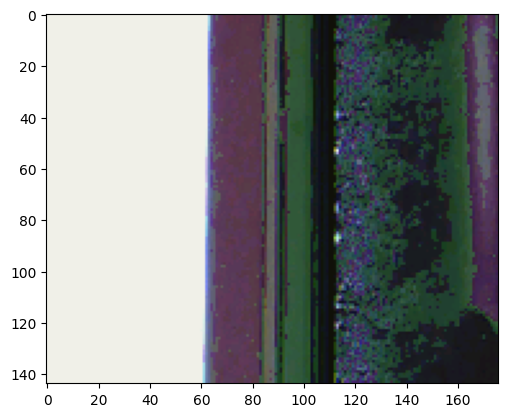

In [3]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()